# Turtle Games

# Predicting Future Outcomes


## Advanced Analytics for Organisational Impact

### Scenario
I worked as a data analyst for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points.
- how useful are remuneration and spending scores data.
- can social data (e.g. customer reviews) be used in marketing campaigns.
- what is the impact on sales per product.
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis).
- if there is any possible relationship(s) in sales between North America, Europe, and global sales.

# 4. EDA using R
The sales department of Turtle games prefers R to Python. As I can perform data analysis in R, I will explore and prepare the data set for analysis by utilising basic statistics and plots. 

## These are the steps I will folow:
1. Load and explore the data.
- Remove redundant columns (Ranking, Year, Genre, Publisher) by creating 
a subset of the data frame.
- Create a summary of the new data frame.

2. Create plots to review and determine insights into data set.
- Create scatterplots, histograms and boxplots to gain insights into
the Sales data.
- Note your observations and diagrams that could be used to provide
insights to the business.

3. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# 0. Downloading and importing the necessary packages.

# Install and import Tidyverse.
install.packages("tidyverse")
library(tidyverse)

# Install and load the 'conflicted' package.
install.packages("conflicted")
library(conflicted)

# Using the conflict_prefer() function to specify which 
##    version of the conflicting functions to use.
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

# Check the current CRAN mirror URL.
getOption("repos")

install.packages(c(
  "repr",
  "IRdisplay",
  "evaluate",
  "crayon",
  "pbdZMQ",
  "devtools",
  "uuid",
  "digest"
), 
repos = "https://cran.rstudio.com/",
dependencies = TRUE)


The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpWUqoWf/downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpWUqoWf/downloaded_packages


[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


CRAN 
"https://cran.r-project.org" 
attr(,"irkernel")
[1] TRUE


The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpWUqoWf/downloaded_packages


In [2]:
# Import the data set.
sales <- read.csv("turtle_sales.csv", header = TRUE)

# Print the data frame.
head(sales)
as_tibble(sales)
summary(sales)

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,107,Wii,2006,Sports,Nintendo,34.02,23.80,67.85
2,2,123,NES,1985,Platform,Nintendo,23.85,2.94,33.00
3,3,195,Wii,2008,Racing,Nintendo,13.00,10.56,29.37
4,4,231,Wii,2009,Sports,Nintendo,12.92,9.03,27.06
5,5,249,GB,1996,Role-Playing,Nintendo,9.24,7.29,25.72
6,6,254,GB,1989,Puzzle,Nintendo,19.02,1.85,24.81


Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,107,Wii,2006,Sports,Nintendo,34.02,23.80,67.85
2,123,NES,1985,Platform,Nintendo,23.85,2.94,33.00
3,195,Wii,2008,Racing,Nintendo,13.00,10.56,29.37
4,231,Wii,2009,Sports,Nintendo,12.92,9.03,27.06
5,249,GB,1996,Role-Playing,Nintendo,9.24,7.29,25.72
6,254,GB,1989,Puzzle,Nintendo,19.02,1.85,24.81
7,263,DS,2006,Platform,Nintendo,9.33,7.57,24.61
8,283,Wii,2006,Misc,Nintendo,11.50,7.54,23.80
9,291,Wii,2009,Platform,Nintendo,11.96,5.79,23.47


    Ranking            Product       Platform              Year     
 Min.   :    1.00   Min.   : 107   Length:352         Min.   :1982  
 1st Qu.:   88.75   1st Qu.:1945   Class :character   1st Qu.:2003  
 Median :  176.50   Median :3340   Mode  :character   Median :2009  
 Mean   : 1428.02   Mean   :3607                      Mean   :2007  
 3rd Qu.: 1439.75   3rd Qu.:5436                      3rd Qu.:2012  
 Max.   :16096.00   Max.   :9080                      Max.   :2016  
                                                      NA's   :2     
    Genre            Publisher            NA_Sales          EU_Sales     
 Length:352         Length:352         Min.   : 0.0000   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 0.4775   1st Qu.: 0.390  
 Mode  :character   Mode  :character   Median : 1.8200   Median : 1.170  
                                       Mean   : 2.5160   Mean   : 1.644  
                                       3rd Qu.: 3.1250   3rd Qu.: 2.160  
    

In [3]:
# Create a new data frame from a subset of the sales data frame.
# Remove redundant columns (Ranking, Year, Genre, Publisher).
new_sales <- subset(sales, select = -c(Ranking, Year, Genre, Publisher))

# View the data frame.
head(new_sales)

# View the descriptive statistics.
summary(new_sales)

,Product,Platform,NA_Sales,EU_Sales,Global_Sales
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,107,Wii,34.02,23.80,67.85
2,123,NES,23.85,2.94,33.00
3,195,Wii,13.00,10.56,29.37
4,231,Wii,12.92,9.03,27.06
5,249,GB,9.24,7.29,25.72
6,254,GB,19.02,1.85,24.81


    Product       Platform            NA_Sales          EU_Sales     
 Min.   : 107   Length:352         Min.   : 0.0000   Min.   : 0.000  
 1st Qu.:1945   Class :character   1st Qu.: 0.4775   1st Qu.: 0.390  
 Median :3340   Mode  :character   Median : 1.8200   Median : 1.170  
 Mean   :3607                      Mean   : 2.5160   Mean   : 1.644  
 3rd Qu.:5436                      3rd Qu.: 3.1250   3rd Qu.: 2.160  
 Max.   :9080                      Max.   :34.0200   Max.   :23.800  
  Global_Sales   
 Min.   : 0.010  
 1st Qu.: 1.115  
 Median : 4.320  
 Mean   : 5.335  
 3rd Qu.: 6.435  
 Max.   :67.850  

In [4]:
# Convert the 'product' column to a character type.
new_sales$Product <- as.character(new_sales$Product)

# Check the data types after conversion.
str(new_sales)

'data.frame':	352 obs. of  5 variables:
 $ Product     : chr  "107" "123" "195" "231" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ NA_Sales    : num  34.02 23.85 13 12.92 9.24 ...
 $ EU_Sales    : num  23.8 2.94 10.56 9.03 7.29 ...
 $ Global_Sales: num  67.8 33 29.4 27.1 25.7 ...


In [5]:
# Export and save the new data frame as new_sales as a CSV file.
write.csv(new_sales, file = "/Users/alonsoroblescristina/Desktop/COURSE 3/LSE_DA301_assignment_files/new_sales.csv", 
          row.names = FALSE)

In [6]:
# Import the new sales data set.
new_sales <- read.csv("new_sales.csv", header = TRUE)

# Print the data frame.
head(new_sales)

,Product,Platform,NA_Sales,EU_Sales,Global_Sales
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,107,Wii,34.02,23.80,67.85
2,123,NES,23.85,2.94,33.00
3,195,Wii,13.00,10.56,29.37
4,231,Wii,12.92,9.03,27.06
5,249,GB,9.24,7.29,25.72
6,254,GB,19.02,1.85,24.81


In [7]:
# Convert the 'product' column to a character type.
new_sales$Product <- as.character(new_sales$Product)

# Check the data types after conversion.
str(new_sales)

'data.frame':	352 obs. of  5 variables:
 $ Product     : chr  "107" "123" "195" "231" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ NA_Sales    : num  34.02 23.85 13 12.92 9.24 ...
 $ EU_Sales    : num  23.8 2.94 10.56 9.03 7.29 ...
 $ Global_Sales: num  67.8 33 29.4 27.1 25.7 ...


## 2. Create plots to review and determine insights into data set.


The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpQhTvbW/downloaded_packages


Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


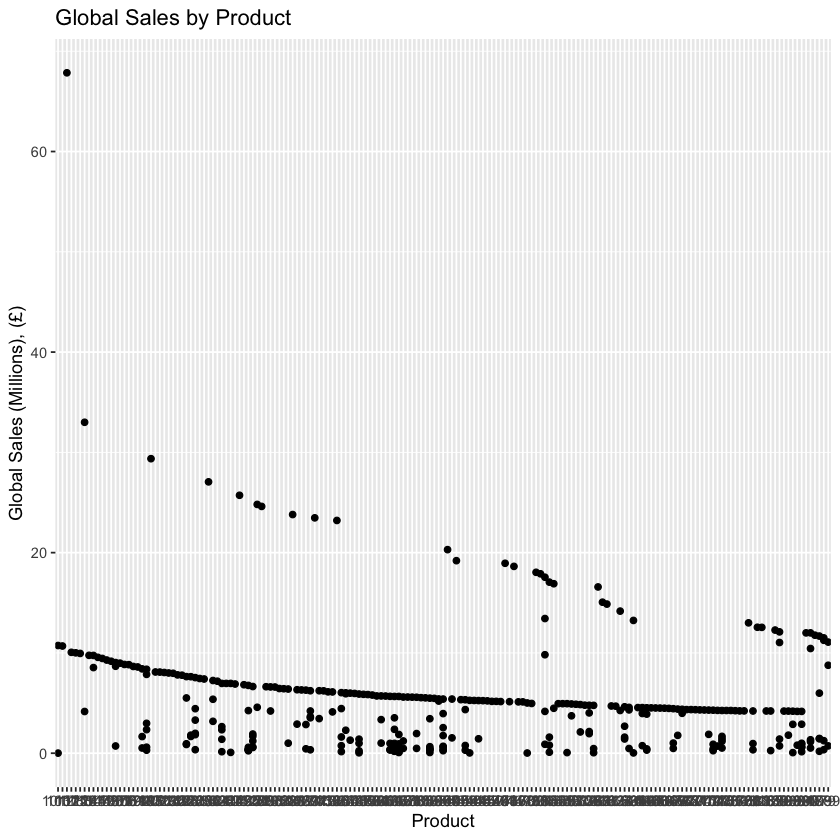

In [8]:
# Review plots to determine insights into the data set.
install.packages("ggplot2")
library(ggplot2)

# 2a) Create scatterplots.

# Does the Product typen and Platform influence Sales?

# View the plot for Global Sales.
qplot(x = Product, y = Global_Sales, data = new_sales,
      xlab = "Product", ylab = "Global Sales (Millions), (£)",
      main = "Global Sales by Product",
      geom = 'point')

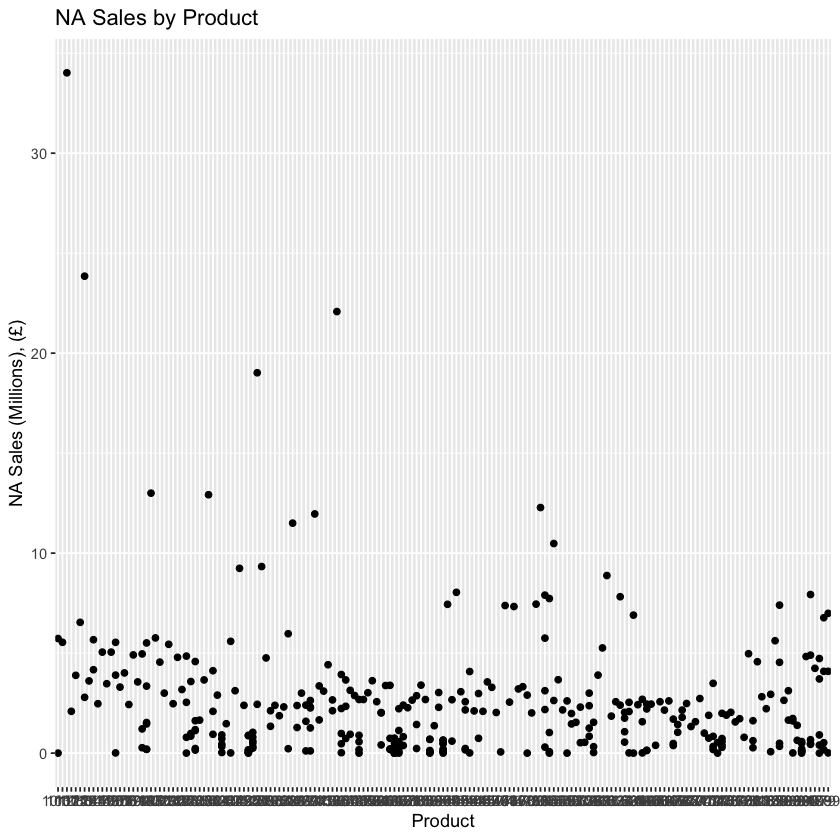

In [9]:
# View the plot for NA Sales.
qplot(x = Product, y = NA_Sales, data = new_sales,
      xlab = "Product", ylab = "NA Sales (Millions), (£)",
      main = "NA Sales by Product",
      geom = 'point')

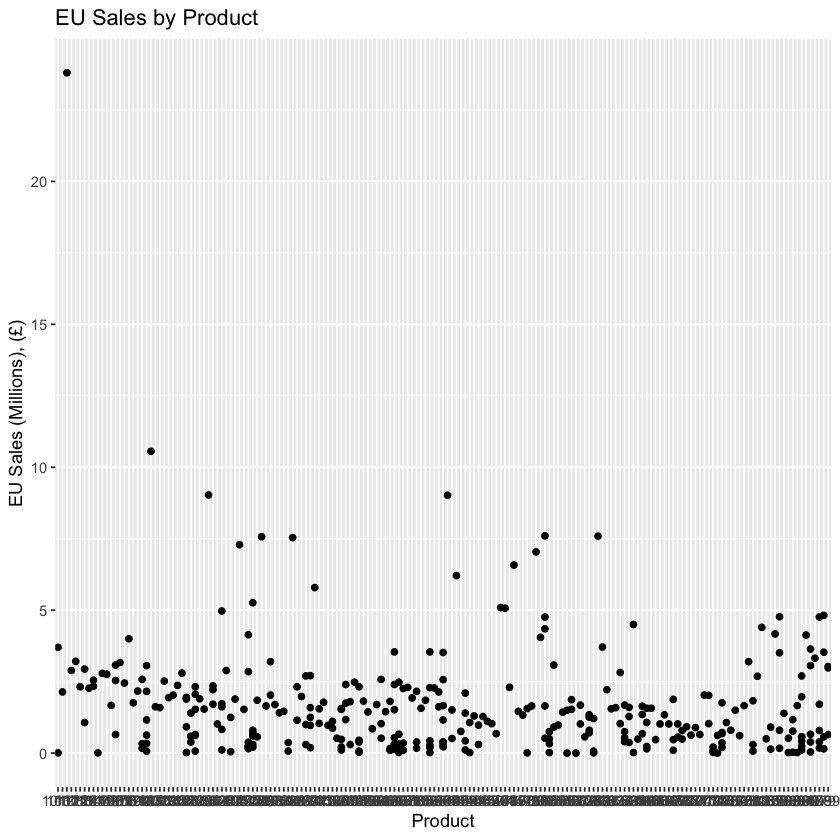

In [10]:
# View the plot for EU Sales.
qplot(x = Product, y = EU_Sales, data = new_sales, 
      xlab = "Product", ylab = "EU Sales (Millions), (£)",
      main = "EU Sales by Product",
      geom = 'point')

Due to the extense number of product types, it is a bit tricky to identify the outliers and the patterns in the sales by Product.

This is why I decided to print the first 10 rows of the data frame order by Product and Sales, so we can essily see the Sales by Product_id.

In [11]:
# Group data based on Product and determine the sum of Global Sales per Product.
global_sales_summary <- new_sales %>%
  group_by(Product) %>%
  summarise(Global_Sales = sum(Global_Sales))

# View the first 10 rows of the data frame.
first_10_rows <- head(global_sales_summary, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product Global_Sales
   <chr>          <dbl>
 1 1012           10.8 
 2 1031           10.7 
 3 107            67.8 
 4 1175           10.1 
 5 1183           10.0 
 6 1212            9.95
 7 123            37.2 
 8 1241            9.76
 9 1307           18.3 
10 1459            9.56


In [12]:
# Order the data frame in descending order of Global_Sales
global_sales_summary_ordered <- global_sales_summary %>%
  arrange(desc(Global_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(global_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product Global_Sales
   <chr>          <dbl>
 1 107             67.8
 2 515             45.9
 3 123             37.2
 4 254             29.4
 5 195             29.4
 6 231             27.1
 7 249             25.7
 8 948             25.4
 9 876             25.3
10 263             24.6


In [13]:
# Group data based on Product and determine the sum of NA Sales per Product.
NA_sales_summary <- new_sales %>%
  group_by(Product) %>%
  summarise(NA_Sales = sum(NA_Sales))

# View the first 10 rows of the data frame.
first_10_rows <- head(NA_sales_summary, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product NA_Sales
   <chr>      <dbl>
 1 1012        5.73
 2 1031        5.54
 3 107        34.0 
 4 1175        2.09
 5 1183        3.89
 6 1212        6.54
 7 123        26.6 
 8 1241        3.61
 9 1307        9.84
10 1459        2.47


In [14]:
# Order the data frame in descending order of NA_Sales.
NA_sales_summary_ordered <- NA_sales_summary %>%
  arrange(desc(NA_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(NA_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product NA_Sales
   <chr>      <dbl>
 1 107         34.0
 2 123         26.6
 3 326         22.1
 4 254         21.5
 5 515         19.2
 6 948         14.4
 7 535         13.1
 8 195         13  
 9 231         12.9
10 876         12.8


In [15]:
# Group data based on Product and determine the sum of EU Sales per Product.
EU_sales_summary <- new_sales %>%
  group_by(Product) %>%
  summarise(EU_Sales = sum(EU_Sales))

# View the first 10 rows of the data frame.
first_10_rows <- head(EU_sales_summary, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product EU_Sales
   <chr>      <dbl>
 1 1012        3.71
 2 1031        2.14
 3 107        23.8 
 4 1175        2.89
 5 1183        3.21
 6 1212        2.32
 7 123         4.01
 8 1241        2.27
 9 1307        4.89
10 1459        0.01


In [16]:
# Order the data frame in descending order of NA_Sales.
EU_sales_summary_ordered <- EU_sales_summary %>%
  arrange(desc(EU_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(EU_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product EU_Sales
   <chr>      <dbl>
 1 107        23.8 
 2 515        18.9 
 3 195        10.6 
 4 3967       10.2 
 5 2371        9.26
 6 876         9.25
 7 3645        9.14
 8 979         9.07
 9 231         9.03
10 399         9.02


#### 2b) Create histograms.

In [17]:
# Group data based on the Platform and determine the sum of Global Sales per Platform.
global_sales_summary <- new_sales %>%
  group_by(Platform) %>%
  summarise(Global_Sales = sum(Global_Sales))

# View the first 10 rows of the data frame.
first_10_rows <- head(global_sales_summary, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Platform Global_Sales
   <chr>           <dbl>
 1 2600             6.4 
 2 3DS             73.2 
 3 DS             205.  
 4 GB             134.  
 5 GBA             47.1 
 6 GC              21.7 
 7 GEN              4.94
 8 N64             44.5 
 9 NES             91.4 
10 PC              43.1 


In [18]:
# Order the data frame in descending order of Global_Sales
global_sales_summary_ordered <- global_sales_summary %>%
  arrange(desc(Global_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(global_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Platform Global_Sales
   <chr>           <dbl>
 1 Wii             313. 
 2 X360            254. 
 3 PS3             212. 
 4 DS              205. 
 5 GB              134. 
 6 PS2             132. 
 7 NES              91.4
 8 PS               82.9
 9 3DS              73.2
10 PS4              70.5


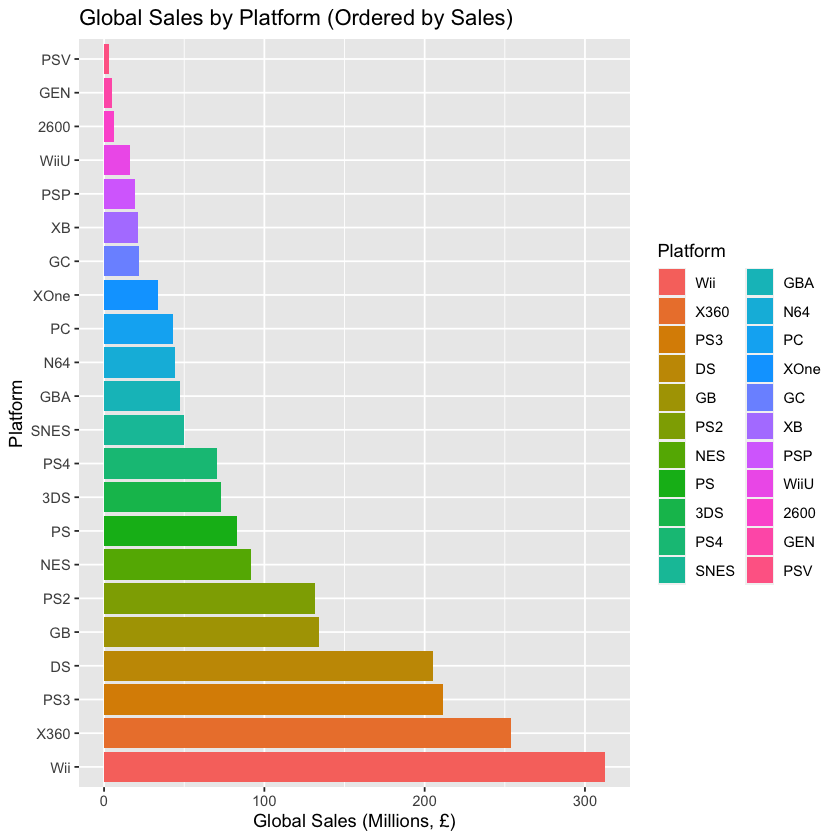

In [19]:
# Does the Platform type influence Sales?

# Reorder the Platform variable based on Global Sales.
global_sales_summary_ordered$Platform <- reorder(global_sales_summary_ordered$Platform, 
                                                 -global_sales_summary_ordered$Global_Sales)

# View the plot "Global Sales by Platform".
ggplot(global_sales_summary_ordered, aes(x = Global_Sales, y = Platform, fill = Platform)) +
  geom_col() +
  labs(x = "Global Sales (Millions, £)",
       y = "Platform",
       title = "Global Sales by Platform (Ordered by Sales)")

In [20]:
# Group data based on the Platform and determine the sum of NA Sales per Platform.
NA_sales_summary <- new_sales %>%
  group_by(Platform) %>%
  summarise(NA_Sales = sum(NA_Sales))

# View the first 10 rows of the data frame.
first_10_rows <- head(NA_sales_summary, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Platform NA_Sales
   <chr>       <dbl>
 1 2600         5.97
 2 3DS         26.4 
 3 DS          72.6 
 4 GB          68.7 
 5 GBA         22.0 
 6 GC          13.8 
 7 GEN          3.67
 8 N64         26.4 
 9 NES         66.0 
10 PC          11.0 


In [21]:
# Order the data frame in descending order of NA_Sales.
NA_sales_summary_ordered <- NA_sales_summary %>%
  arrange(desc(NA_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(NA_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Platform NA_Sales
   <chr>       <dbl>
 1 X360        153. 
 2 Wii         150. 
 3 PS3          77.8
 4 DS           72.6
 5 GB           68.7
 6 NES          66.0
 7 PS2          58.7
 8 PS           34.0
 9 N64          26.4
10 3DS          26.4


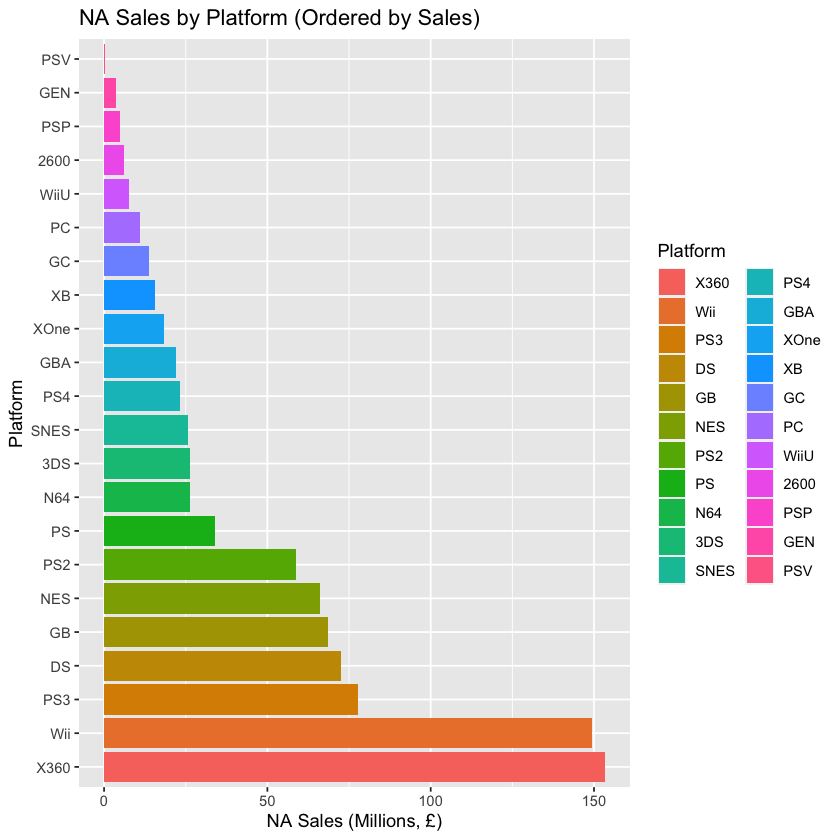

In [22]:
# Reorder the Platform variable based on NA Sales.
NA_sales_summary_ordered$Platform <- reorder(NA_sales_summary_ordered$Platform, 
                                                 -NA_sales_summary_ordered$NA_Sales)

# View the plot "NA Sales by Platform".
ggplot(NA_sales_summary_ordered, aes(x = NA_Sales, y = Platform, fill = Platform)) +
  geom_col() +
  labs(x = "NA Sales (Millions, £)",
       y = "Platform",
       title = "NA Sales by Platform (Ordered by Sales)")

In [23]:
# Group data based on the Platform and determine the sum of EU Sales per Platform.
EU_sales_summary <- new_sales %>%
  group_by(Platform) %>%
  summarise(EU_Sales = sum(EU_Sales))

# View the first 10 rows of the data frame.
first_10_rows <- head(EU_sales_summary, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Platform EU_Sales
   <chr>       <dbl>
 1 2600         0.37
 2 3DS         21.6 
 3 DS          65.6 
 4 GB          28.2 
 5 GBA         11.6 
 6 GC           4.7 
 7 GEN          0.98
 8 N64          9.36
 9 NES          9.14
10 PC          27.9 


In [24]:
# Order the data frame in descending order of EU Sales.
EU_sales_summary_ordered <- EU_sales_summary %>%
  arrange(desc(EU_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(EU_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Platform EU_Sales
   <chr>       <dbl>
 1 Wii         105. 
 2 PS3          88.5
 3 X360         76.0
 4 DS           65.6
 5 PS4          34.1
 6 PS2          31.5
 7 GB           28.2
 8 PC           27.9
 9 PS           25.6
10 3DS          21.6


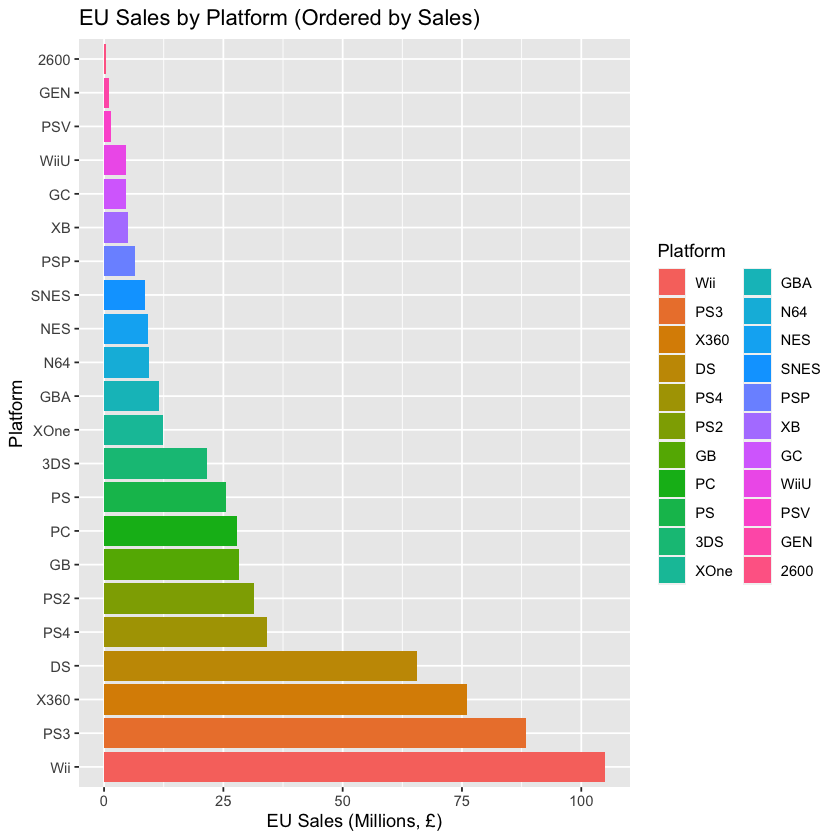

In [25]:
# Reorder the Platform variable based on EU Sales.
EU_sales_summary_ordered$Platform <- reorder(EU_sales_summary_ordered$Platform, 
                                                 -EU_sales_summary_ordered$EU_Sales)

# View the plot "EU Sales by Platform".
ggplot(EU_sales_summary_ordered, aes(x = EU_Sales, y = Platform, fill = Platform)) +
  geom_col() +
  labs(x = "EU Sales (Millions, £)",
       y = "Platform",
       title = "EU Sales by Platform (Ordered by Sales)")

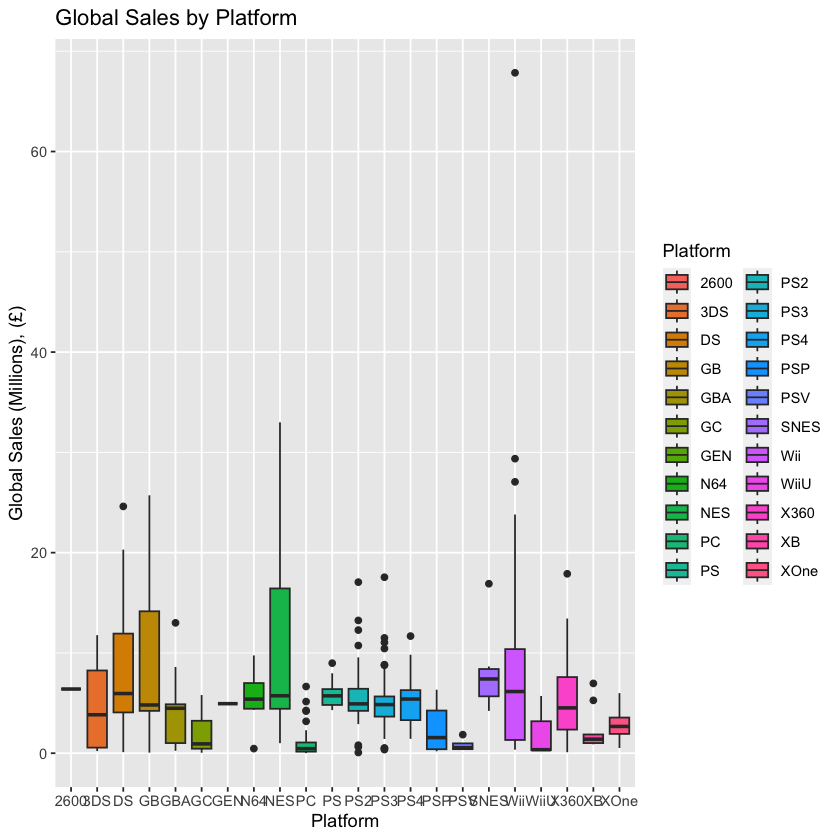

In [26]:
# 2c) Create boxplots.

# View the boxplot "Global Sales by Platform".
qplot(x = factor(Platform), y = Global_Sales, data = new_sales,
      xlab = "Platform", ylab = "Global Sales (Millions), (£)",
      main = "Global Sales by Platform",
      geom = "boxplot", fill = Platform)

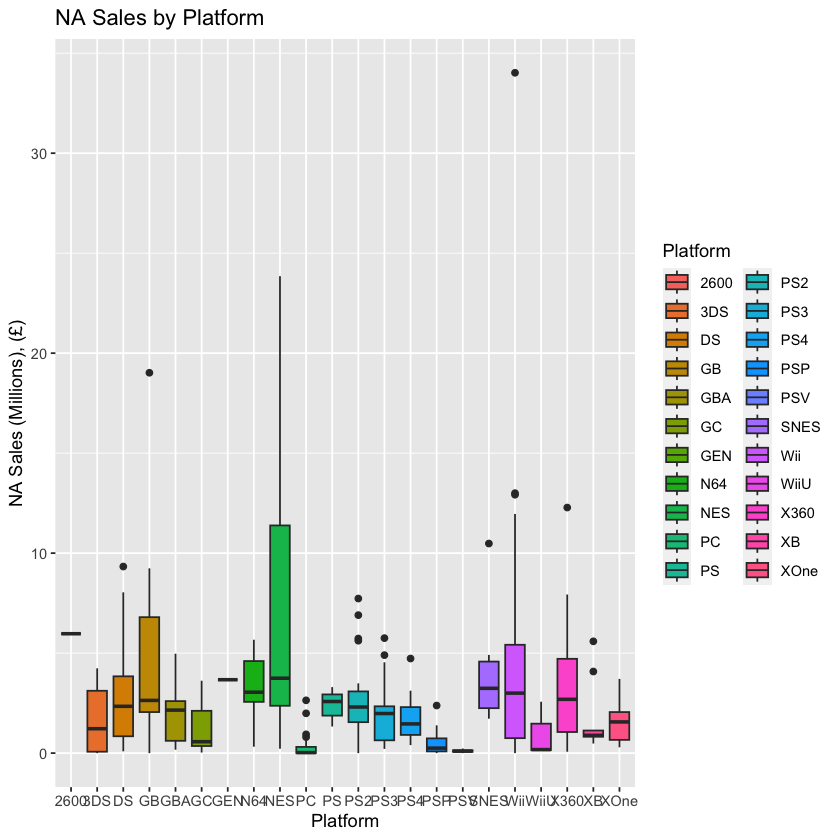

In [27]:
# View the boxplot "NA Sales by Platform".
qplot(x = factor(Platform), y = NA_Sales, data = new_sales,
      xlab = "Platform", ylab = "NA Sales (Millions), (£)",
      main = "NA Sales by Platform",
      geom = "boxplot", fill = Platform)

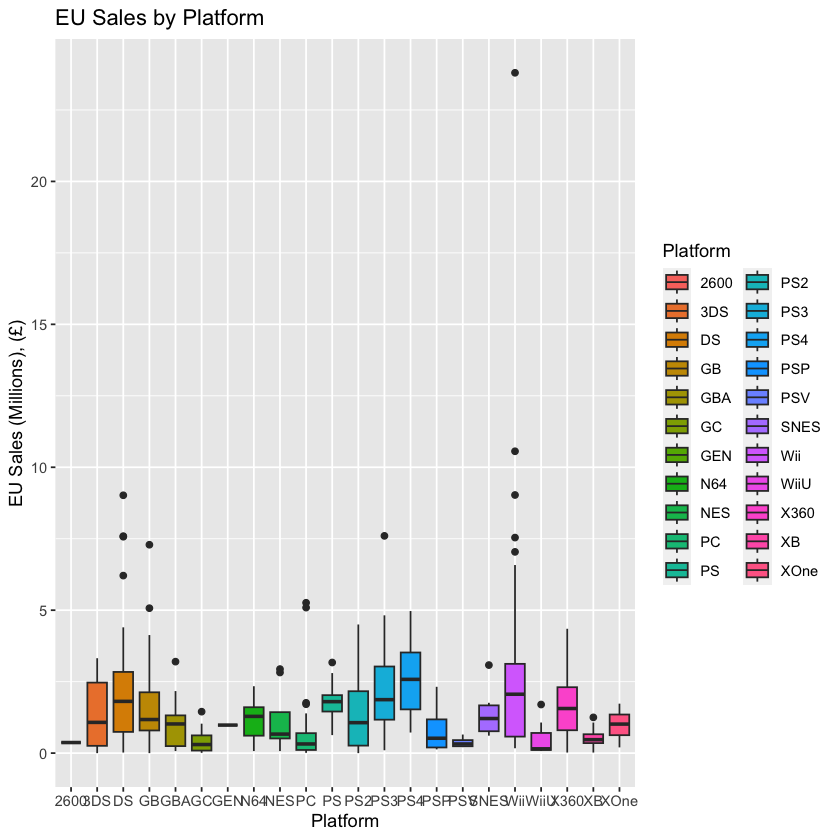

In [28]:
# View the boxplot "EU Sales by Platform".
qplot(x = factor(Platform), y = EU_Sales, data = new_sales,
      xlab = "Platform", ylab = "EU Sales (Millions), (£)",
      main = "EU Sales by Platform",
      geom = "boxplot", fill = Platform)

## 3. Insights and observations.

Since we already had a look at the Platforms that influence sales the most by market, it is worth having a look at how each platforms behave compared to the rest of the platforms, in terms of the sales that they produce. I will do this, by looking at the boxplots.

After plotting the data for each of the sales my market, we can clearly see that there are some outliers, reflected on the black dots above each boxplot by latform.

The platforms with the most significant outliers are the ones that influence sales the most.

# 

# 5. Cleaning and manipulating data using R


Utilising R, you will explore, prepare and explain the normality of the data
set based on plots, Skewness, Kurtosis, and a Shapiro-Wilk test. Note that
you will use this data set in future modules as well and it is, therefore, 
strongly encouraged to first clean the data as per provided guidelines and 
then save a copy of the clean data for future use.

## These are the steps I will follow:
1. Load and explore the data.
- Continue to use the data frame that you prepared in the Week 4 assignment. 
- View the data frame to sense-check the data set.
- Determine the `min`, `max` and `mean` values of all the sales data.
- Create a summary of the data frame.

2. Determine the impact on sales per product_id.
- Use the group_by and aggregate functions to sum the values grouped by
product.
- Create a summary of the new data frame.

3. Create plots to review and determine insights into the data set.
- Create scatterplots, histograms, and boxplots to gain insights into 
the Sales data.
- Note your observations and diagrams that could be used to provide 
insights to the business.

4. Determine the normality of the data set.
- Create and explore Q-Q plots for all sales data.
- Perform a Shapiro-Wilk test on all the sales data.
- Determine the Skewness and Kurtosis of all the sales data.
- Determine if there is any correlation between the sales data columns.

5. Create plots to gain insights into the sales data.
- Compare all the sales data (columns) for any correlation(s).
- Add a trend line to the plots for ease of interpretation.

6. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# 0.Prepare your workstation

# Import the necessary libraries.
# Create insightful summaries of data set.
install.packages("skimr")
library(skimr)

# Create insightful reports of data set.
install.packages("DataExplorer")
library(DataExplorer)
library(tibble)


The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpFG0plg/downloaded_packages

The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpFG0plg/downloaded_packages


In [3]:
# Import the new_sales data set created in Week 4.
new_sales <- read.csv("new_sales.csv", header = TRUE)

# Print the data frame.
head(new_sales)

,Product,Platform,NA_Sales,EU_Sales,Global_Sales
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,107,Wii,34.02,23.80,67.85
2,123,NES,23.85,2.94,33.00
3,195,Wii,13.00,10.56,29.37
4,231,Wii,12.92,9.03,27.06
5,249,GB,9.24,7.29,25.72
6,254,GB,19.02,1.85,24.81


In [4]:
# Convert the 'product' column to a character type.
new_sales$Product <- as.character(new_sales$Product)

# Check the data types after conversion.
str(new_sales)

'data.frame':	352 obs. of  5 variables:
 $ Product     : chr  "107" "123" "195" "231" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ NA_Sales    : num  34.02 23.85 13 12.92 9.24 ...
 $ EU_Sales    : num  23.8 2.94 10.56 9.03 7.29 ...
 $ Global_Sales: num  67.8 33 29.4 27.1 25.7 ...


In [5]:
# Determine if there are missing values. 
new_sales[is.na(new_sales)] 
sum(is.na(new_sales))

character(0)

[1] 0

In [6]:
# Check output: Determine the min, max, and mean values of the all the Sales columns.
# Using summary function.
summary(new_sales$Global_Sales)
summary(new_sales$NA_Sales)
summary(new_sales$EU_Sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.010   1.115   4.320   5.335   6.435  67.850 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4775  1.8200  2.5160  3.1250 34.0200 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.390   1.170   1.644   2.160  23.800 

In [7]:
# View the descriptive statistics.
summary(new_sales)

   Product            Platform            NA_Sales          EU_Sales     
 Length:352         Length:352         Min.   : 0.0000   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 0.4775   1st Qu.: 0.390  
 Mode  :character   Mode  :character   Median : 1.8200   Median : 1.170  
                                       Mean   : 2.5160   Mean   : 1.644  
                                       3rd Qu.: 3.1250   3rd Qu.: 2.160  
                                       Max.   :34.0200   Max.   :23.800  
  Global_Sales   
 Min.   : 0.010  
 1st Qu.: 1.115  
 Median : 4.320  
 Mean   : 5.335  
 3rd Qu.: 6.435  
 Max.   :67.850  

By looking at the above values, we can see that NA Sales are higher than EU Sales, being the highest sales observed in NA (34M) versus 23.8M of EU Sales. The Global Sales are 67.8M.

## 2. Determine the impact on sales per product_id

In [8]:
## 2a) Use the group_by and aggregate functions.
# Group data based on Product and determine the sum of Global Sales per Product.
global_sales_summary <- new_sales %>%
  group_by(Product) %>%
  summarise(Total_Global_Sales = sum(Global_Sales))

In [9]:
# View the data frame for Total Global Sales.
head(global_sales_summary)

Product,Total_Global_Sales
<chr>,<dbl>
1012,10.75
1031,10.69
107,67.85
1175,10.06
1183,10.01
1212,9.95


In [10]:
# Order the data frame in descending order of Total_Global_Sales.
total_global_sales_summary_ordered <- global_sales_summary %>%
  arrange(desc(Total_Global_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(total_global_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product Total_Global_Sales
   <chr>                <dbl>
 1 107                   67.8
 2 515                   45.9
 3 123                   37.2
 4 254                   29.4
 5 195                   29.4
 6 231                   27.1
 7 249                   25.7
 8 948                   25.4
 9 876                   25.3
10 263                   24.6


In [11]:
# Group data based on Product and determine the sum of NA Sales per Product.
NA_sales_summary <- new_sales %>%
  group_by(Product) %>%
  summarise(Total_NA_Sales = sum(NA_Sales))

In [12]:
# View the data frame for Total NA Sales.
head(NA_sales_summary)

Product,Total_NA_Sales
<chr>,<dbl>
1012,5.73
1031,5.54
107,34.02
1175,2.09
1183,3.89
1212,6.54


In [13]:
# Order the data frame in descending order of Total_NA_Sales
total_NA_sales_summary_ordered <- NA_sales_summary %>%
  arrange(desc(Total_NA_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(total_NA_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product Total_NA_Sales
   <chr>            <dbl>
 1 107               34.0
 2 123               26.6
 3 326               22.1
 4 254               21.5
 5 515               19.2
 6 948               14.4
 7 535               13.1
 8 195               13  
 9 231               12.9
10 876               12.8


In [14]:
# Group data based on Product and determine the sum of EU Sales per Product.
EU_sales_summary <- new_sales %>%
  group_by(Product) %>%
  summarise(Total_EU_Sales = sum(EU_Sales))

In [15]:
# View the data frame for Total Global Sales.
head(EU_sales_summary)

Product,Total_EU_Sales
<chr>,<dbl>
1012,3.71
1031,2.14
107,23.80
1175,2.89
1183,3.21
1212,2.32


In [16]:
# Order the data frame in descending order of Total_EU_Sales
total_EU_sales_summary_ordered <- EU_sales_summary %>%
  arrange(desc(Total_EU_Sales))

# View the first 10 rows of the ordered data frame.
first_10_rows <- head(total_EU_sales_summary_ordered, 10)
print(first_10_rows)

# A tibble: 10 × 2
   Product Total_EU_Sales
   <chr>            <dbl>
 1 107              23.8 
 2 515              18.9 
 3 195              10.6 
 4 3967             10.2 
 5 2371              9.26
 6 876               9.25
 7 3645              9.14
 8 979               9.07
 9 231               9.03
10 399               9.02


In [17]:
# Create a new data frame 'total_sales' with the new aggregated sales columns.
total_sales <- data.frame(Product = global_sales_summary$Product,
                          Total_NA_Sales = NA_sales_summary$Total_NA_Sales,
                          Total_EU_Sales = EU_sales_summary$Total_EU_Sales,
                          Total_Global_Sales = global_sales_summary$Total_Global_Sales)

# View the first 10 rows of the new data frame 'total_sales'.
first_10_rows <- head(total_sales, 10)
print(first_10_rows)

   Product Total_NA_Sales Total_EU_Sales Total_Global_Sales
1     1012           5.73           3.71              10.75
2     1031           5.54           2.14              10.69
3      107          34.02          23.80              67.85
4     1175           2.09           2.89              10.06
5     1183           3.89           3.21              10.01
6     1212           6.54           2.32               9.95
7      123          26.64           4.01              37.16
8     1241           3.61           2.27               9.76
9     1307           9.84           4.89              18.29
10    1459           2.47           0.01               9.56


In [18]:
# Explore the total_sales data frame.
head(total_sales)
tail(total_sales)
dim(total_sales)
str(total_sales)
summary(total_sales)

,Product,Total_NA_Sales,Total_EU_Sales,Total_Global_Sales
,<chr>,<dbl>,<dbl>,<dbl>
1,1012,5.73,3.71,10.75
2,1031,5.54,2.14,10.69
3,107,34.02,23.80,67.85
4,1175,2.09,2.89,10.06
5,1183,3.89,3.21,10.01
6,1212,6.54,2.32,9.95


,Product,Total_NA_Sales,Total_EU_Sales,Total_Global_Sales
,<chr>,<dbl>,<dbl>,<dbl>
170,930,4.83,4.13,12.00
171,948,14.42,7.79,25.45
172,977,4.24,3.32,11.77
173,978,9.75,7.83,20.77
174,979,11.55,9.07,24.36
175,999,11.09,6.66,20.58


[1] 175   4

'data.frame':	175 obs. of  4 variables:
 $ Product           : chr  "1012" "1031" "107" "1175" ...
 $ Total_NA_Sales    : num  5.73 5.54 34.02 2.09 3.89 ...
 $ Total_EU_Sales    : num  3.71 2.14 23.8 2.89 3.21 2.32 4.01 2.27 4.89 0.01 ...
 $ Total_Global_Sales: num  10.8 10.7 67.8 10.1 10 ...


   Product          Total_NA_Sales   Total_EU_Sales   Total_Global_Sales
 Length:175         Min.   : 0.060   Min.   : 0.000   Min.   : 4.200    
 Class :character   1st Qu.: 2.495   1st Qu.: 1.460   1st Qu.: 5.515    
 Mode  :character   Median : 3.610   Median : 2.300   Median : 8.090    
                    Mean   : 5.061   Mean   : 3.306   Mean   :10.730    
                    3rd Qu.: 5.570   3rd Qu.: 4.025   3rd Qu.:12.785    
                    Max.   :34.020   Max.   :23.800   Max.   :67.850    

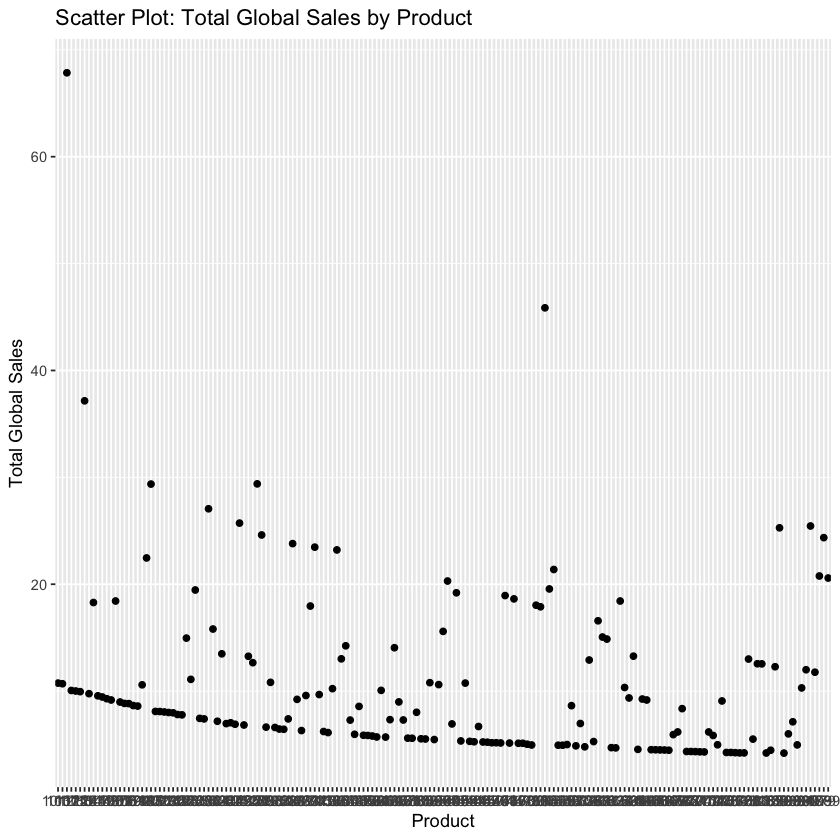

In [19]:
## 2b) Determine which plot is the best to compare game sales.

# Create scatterplots.

# Scatter Plot: Total Global Sales by Product
ggplot(data = total_sales, aes(x = Product, y = Total_Global_Sales)) +
  geom_point() +
  labs(title = "Scatter Plot: Total Global Sales by Product",
       x = "Product",
       y = "Total Global Sales")

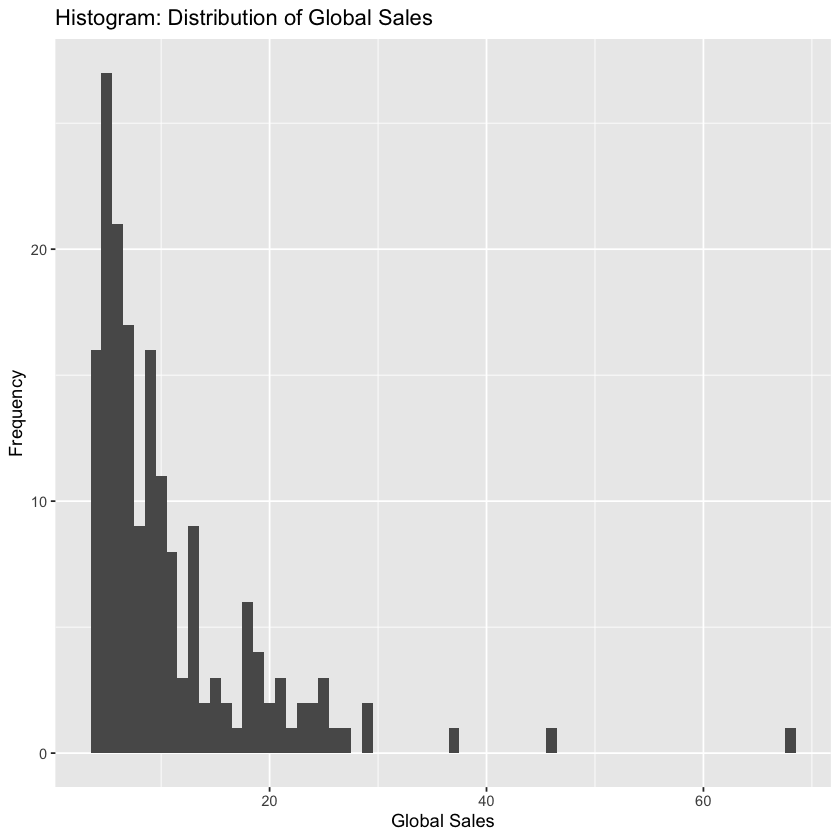

In [20]:
# Create histograms.

# Histogram: Distribution of Total Global Sales
ggplot(data = total_sales, aes(x = Total_Global_Sales)) +
  geom_histogram(binwidth = 1) +  
  labs(title = "Histogram: Distribution of Global Sales",
       x = "Global Sales",
       y = "Frequency")

## 3. Determine the normality of the data set

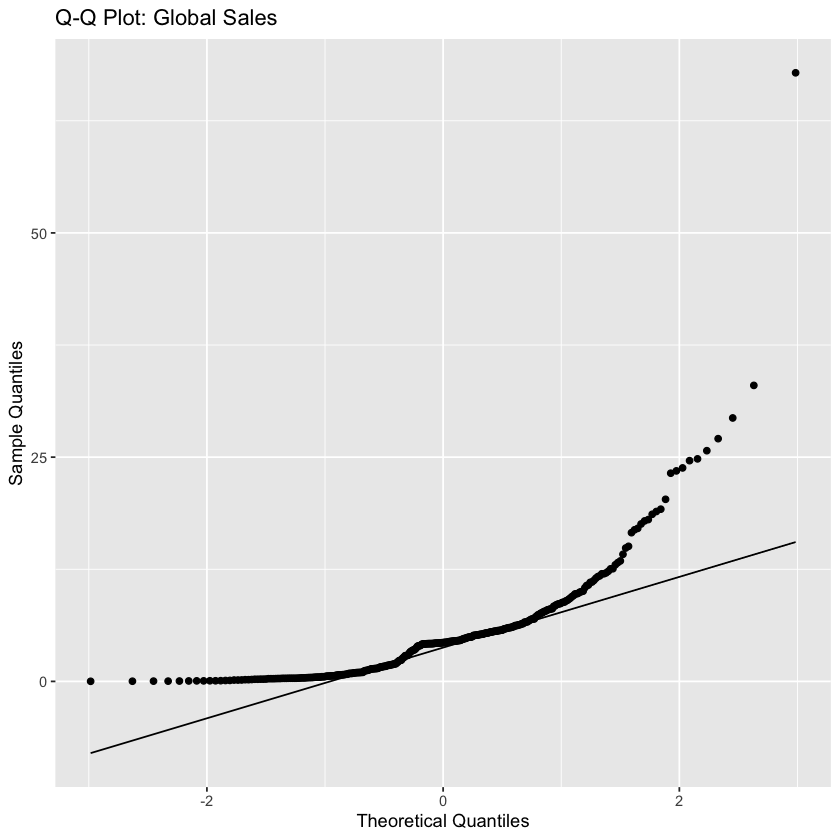

In [21]:
# 3a) Create Q-Q Plots.
# Create Q-Q Plot for Global Sales.
ggplot(data = new_sales, aes(sample = Global_Sales)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot: Global Sales",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

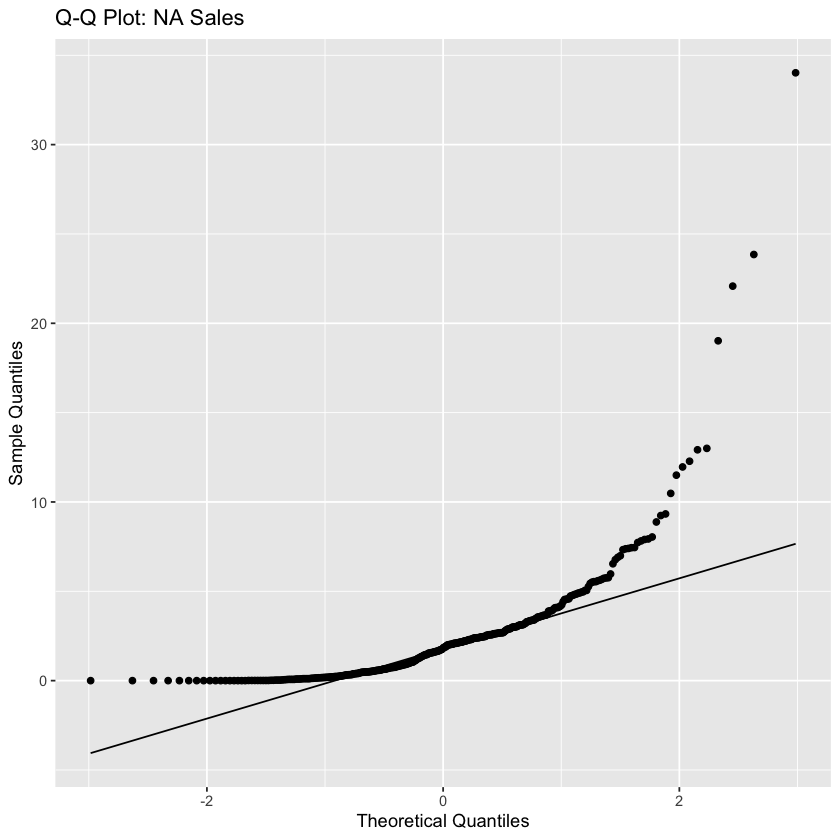

In [22]:
# Create Q-Q Plot for NA Sales.
ggplot(data = new_sales, aes(sample = NA_Sales)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot: NA Sales",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

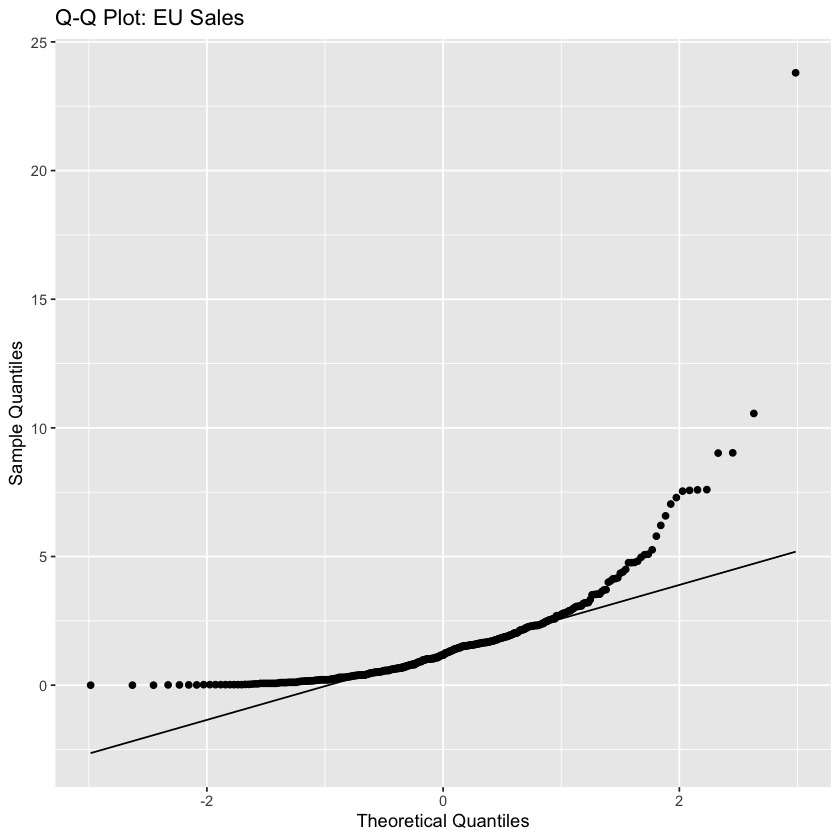

In [24]:
# Create Q-Q Plot for EU Sales.
ggplot(data = new_sales, aes(sample = EU_Sales)) +
  stat_qq() +
  stat_qq_line() +
  labs(title = "Q-Q Plot: EU Sales",
       x = "Theoretical Quantiles",
       y = "Sample Quantiles")

#### Interpreting the Q-Q Plot:

As we can see, the points for the three Sales columns deviate from the line in an S-shape, this indicates that the data might have heavy tails, indicating non-normality.

In [25]:
# 3b) Perform Shapiro-Wilk test.
# Install and import Moments.
install.packages("moments")

# Load the moments package
library(moments)

# Perform Shapiro-Wilk test.

# Perform Shapiro-Wilk test on all sales columns
shapiro_results <- lapply(new_sales[, c("NA_Sales", "EU_Sales", "Global_Sales")], shapiro.test)

# Create a data frame to store the results
shapiro_results_new_sales <- data.frame(
  Column = names(new_sales[, c("NA_Sales", "EU_Sales", "Global_Sales")]),
  p_value = sapply(shapiro_results, function(x) x$p.value),
  is_normal = sapply(shapiro_results, function(x) x$p.value > 0.05)
)

# View the output.
print(shapiro_results_new_sales)


The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpFG0plg/downloaded_packages
                   Column      p_value is_normal
NA_Sales         NA_Sales 7.001091e-27     FALSE
EU_Sales         EU_Sales 2.393884e-26     FALSE
Global_Sales Global_Sales 3.200364e-25     FALSE


#### Shapiro-Wilk test result:

The p-value for the three sales columns is ≤ 0.05, then we reject the null hypothesis. This indicates that there is significant evidence to suggest that the data deviates from a normal distribution. In this case, the data is not normally distributed.

In [26]:
# 3c) Determine Skewness and Kurtosis.
# Skewness and Kurtosis.

# Calculate skewness and kurtosis of sales columns.
skewness_values <- sapply(new_sales[, c("NA_Sales", "EU_Sales", "Global_Sales")], skewness)
kurtosis_values <- sapply(new_sales[, c("NA_Sales", "EU_Sales", "Global_Sales")], kurtosis)

# Create a data frame to store the results.
skewness_kurtosis_new_sales <- data.frame(
  Column = names(new_sales[, c("NA_Sales", "EU_Sales", "Global_Sales")]),
  Skewness = skewness_values,
  Kurtosis = kurtosis_values
)

# View the output.
print(skewness_kurtosis_new_sales)

                   Column Skewness Kurtosis
NA_Sales         NA_Sales 4.309210 31.36852
EU_Sales         EU_Sales 4.818688 44.68924
Global_Sales Global_Sales 4.045582 32.63966


#### Interpreting the Skewness and Kurtosis values:

##### Skewness: 
The skewness values for the three sales columns is positive (greater than 0), meaning that the distribution is skewed to the right, in other words, the tail on the right side is longer than the left side.

##### Kurtosis: 
The Kurtosis values for the sales columns are greater than 3 (positive kurtosis), meaning that the distribution has heavier tails and a sharper peak compared to the normal distribution.

In [27]:
# 3d) Determine correlation between the three sales columns.

# Calculate the correlation matrix.
sales_correlation <- cor(new_sales[, c("NA_Sales", "EU_Sales", "Global_Sales")])

# View the output.
print(sales_correlation)

              NA_Sales  EU_Sales Global_Sales
NA_Sales     1.0000000 0.7055236    0.9349455
EU_Sales     0.7055236 1.0000000    0.8775575
Global_Sales 0.9349455 0.8775575    1.0000000



The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpFG0plg/downloaded_packages


corrplot 0.92 loaded



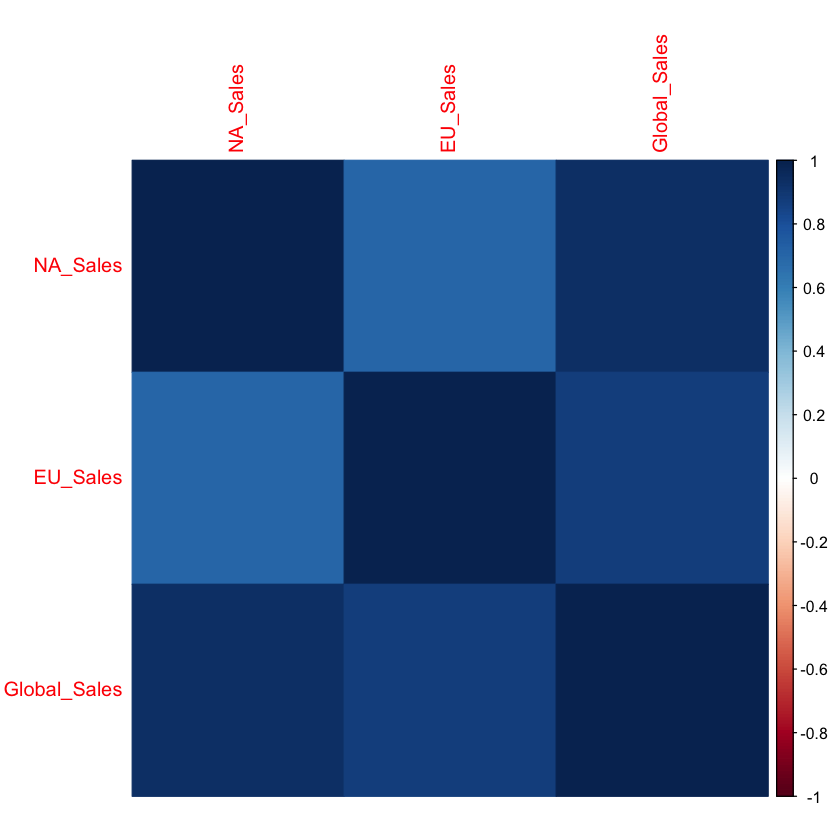

In [28]:
# The sales_correlation matrix will display the correlation coefficients between the specified sales columns. 
# The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 
# 1 indicates a perfect positive correlation, and 0 indicates no correlation.

# Install corrplot package.
install.packages("corrplot")

# Load the corrplot package.
library(corrplot)

# Visualize the correlation matrix as a heatmap.
corrplot(sales_correlation, method = "color")

As expected, there is a positive correlation between the global sales and the NA sales and EU sales, since global sales in the world is the sum of EU sales, NA sales and other sales.

For future analysis, it might worth digging into the 'other sales' category and calculate the sales under this uncategorised group. Turtle Games should properly collect and label the 'other sales' category to identify the market / markets that belong to this category. This would be very useful to inform future marketing campaigns too since we would be able to see socioeconomic and demographic profile of the customers under this category.

## 4. Plot the data

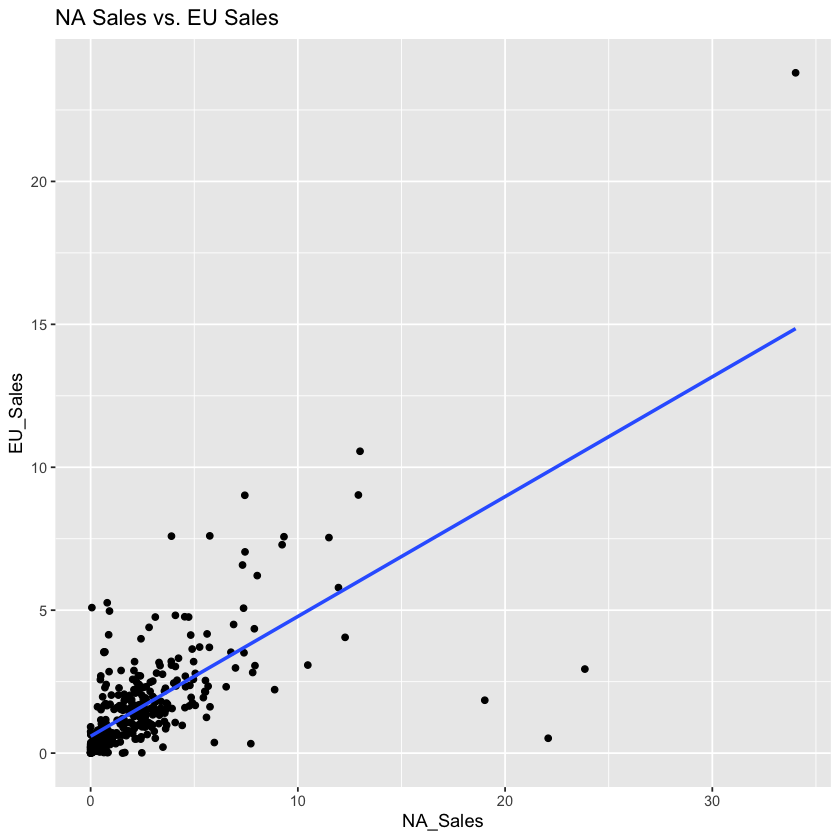

In [29]:
# Create plots to gain insights into the data.
# Scatter plot for NA_Sales vs. EU_Sales.
ggplot(new_sales, aes(x = NA_Sales, y = EU_Sales)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  labs(title = "NA Sales vs. EU Sales",
       x = "NA_Sales",
       y = "EU_Sales")

Overall, NA Sales are greater than EU sales.

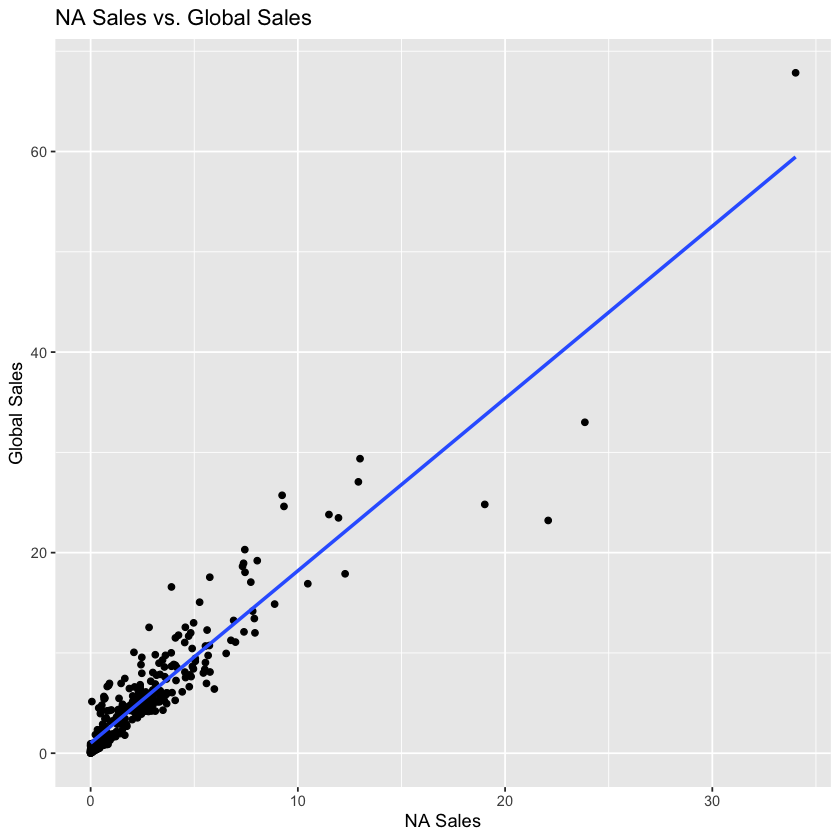

In [30]:
# Scatter plot for NA_Sales vs. Global_Sales
ggplot(new_sales, aes(x = NA_Sales, y = Global_Sales)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  labs(title = "NA Sales vs. Global Sales",
       x = "NA Sales",
       y = "Global Sales")

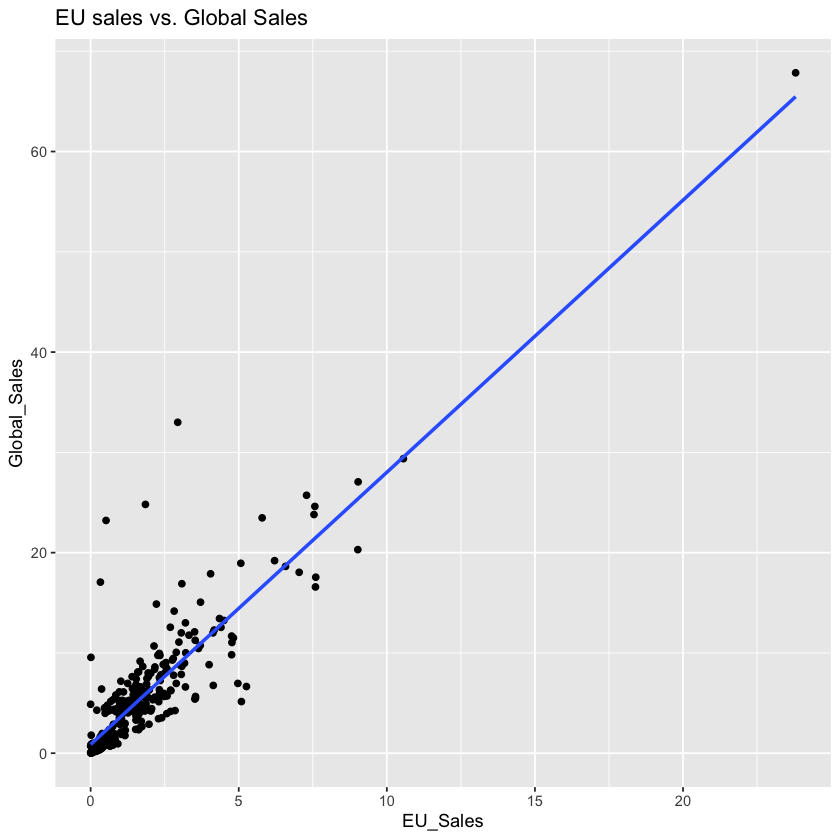

In [31]:
# Scatter plot for EU_Sales vs. Global_Sales
ggplot(new_sales, aes(x = EU_Sales, y = Global_Sales)) +
  geom_point() +
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) + 
  labs(title = "EU sales vs. Global Sales",
       x = "EU_Sales",
       y = "Global_Sales")

Overall, we can see that the global sales are much greater than the EU and NA sales values, and that makes sense.

We can also see how there are some global sales values that deviate more from the normal distribution, meaning that these outliers are the greatest sales values observed within the global sales column, such as the black dot shown way over the 60M mark for Global Sales.

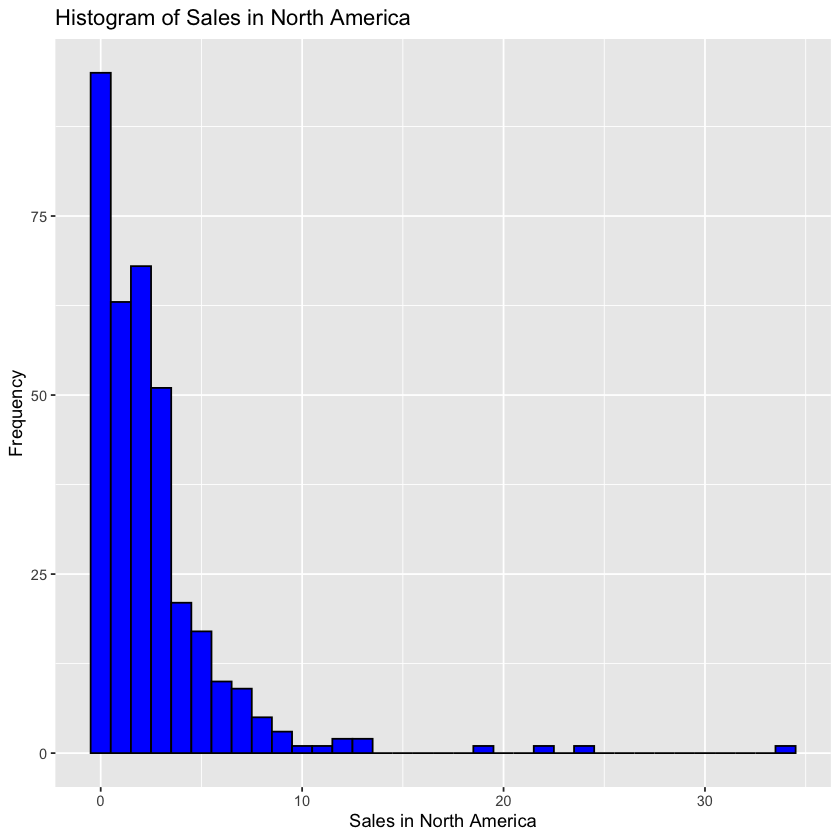

In [32]:
# Histogram of Sales in North America.
ggplot(new_sales, aes(x = NA_Sales)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Histogram of Sales in North America",
       x = "Sales in North America",
       y = "Frequency")

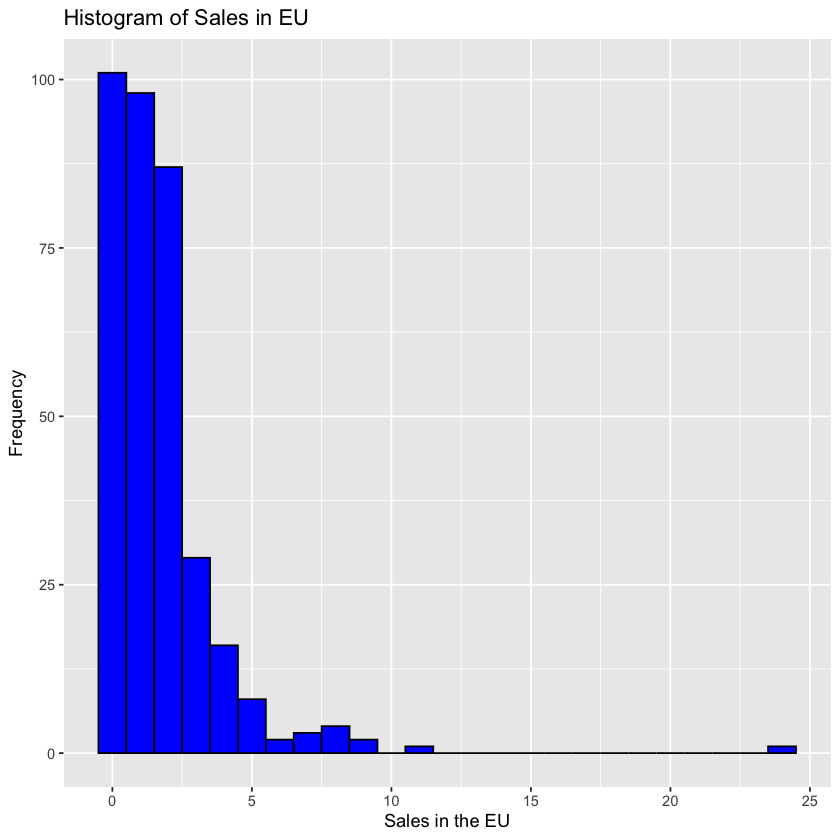

In [33]:
# Histogram of Sales in European Union.
ggplot(new_sales, aes(x = EU_Sales)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Histogram of Sales in EU",
       x = "Sales in the EU",
       y = "Frequency")

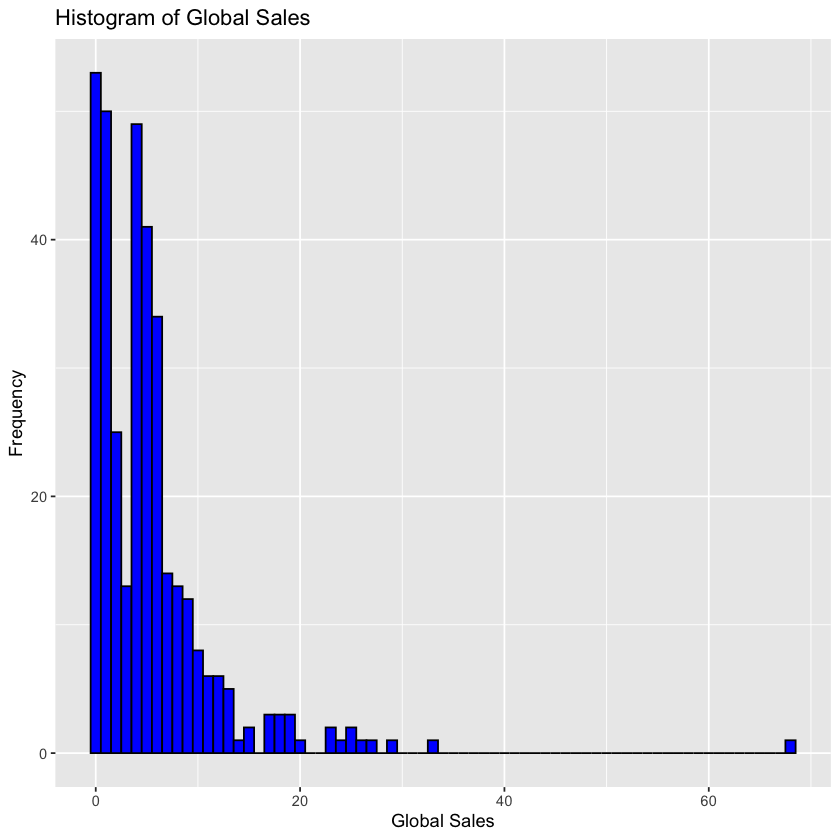

In [34]:
# Histogram of Global Sales.
ggplot(new_sales, aes(x = Global_Sales)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "Histogram of Global Sales",
       x = "Global Sales",
       y = "Frequency")

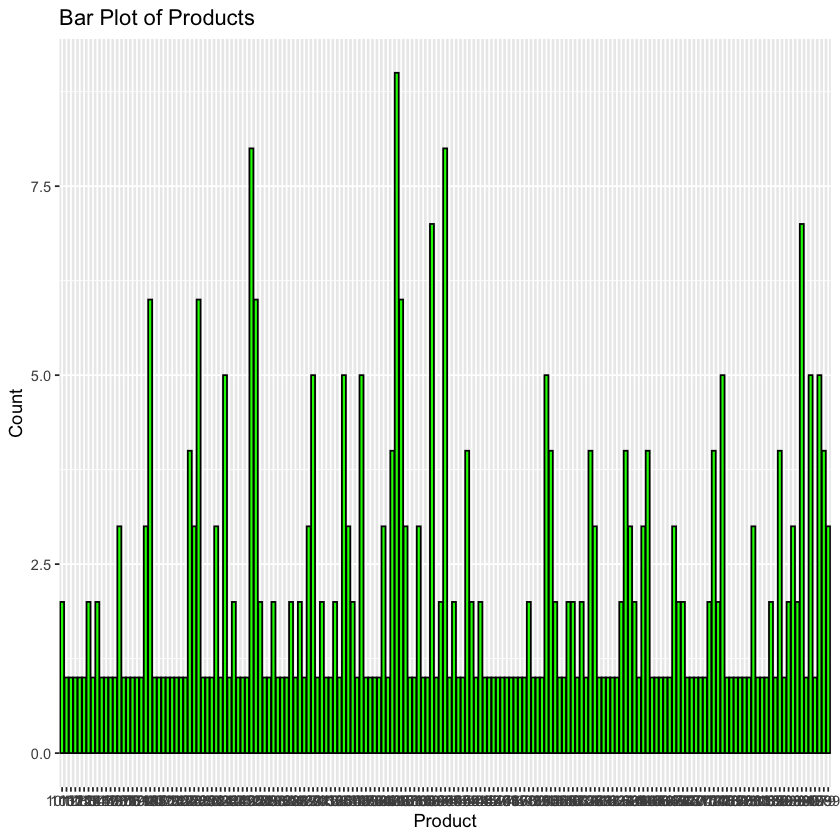

In [35]:
# Barplot of Global Sales.
ggplot(new_sales, aes(x = Product)) +
  geom_bar(fill = "green", color = "black") +
  labs(title = "Bar Plot of Products",
       x = "Product",
       y = "Count")

# 

# 6. Making recommendations to the business
The sales department wants to better understand if there is any relationship between North America, Europe, and global sales. Therefore, I need to investigate any possible relationship(s) in the sales data by creating a 
simple and multiple linear regression model. Based on the models and my
previous analysis, I will then provide recommendations to Turtle Games based on:
- Do I have confidence in the models based on goodness of fit and accuracy of predictions?
- Suggestions and recommendations to the business
- If needed, how would I improve the model(s)?


## Steps I will follow:
1. Load and explore the data.
- Continue to use the data frame that you prepared in the Week 5 assignment. 

2. Create a simple linear regression model.
- Determine the correlation between the sales columns.
- View the output.
- Create plots to view the linear regression.

3. Create a multiple linear regression model
- Select only the numeric columns.
- Determine the correlation between the sales columns.
- View the output.

4. Predict global sales based on provided values. Compare your prediction to the observed value(s).
- NA_Sales_sum of 34.02 and EU_Sales_sum of 23.80.
- NA_Sales_sum of 3.93 and EU_Sales_sum of 1.56.
- NA_Sales_sum of 2.73 and EU_Sales_sum of 0.65.
- NA_Sales_sum of 2.26 and EU_Sales_sum of 0.97.
- NA_Sales_sum of 22.08 and EU_Sales_sum of 0.52.

5. Include your insights and observations.

## 1. Load and explore the data

In [2]:
# 0.Prepare your workstation

# Import the necessary libraries.
# Create insightful summaries of data set.
install.packages("skimr")
library(skimr)

# Create insightful reports of data set.
install.packages("DataExplorer")
library(DataExplorer)
library(tibble)


The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpWUqoWf/downloaded_packages

The downloaded binary packages are in
	/var/folders/fz/gk1vc_0x66369mjlyppr8rh80000gn/T//RtmpWUqoWf/downloaded_packages


In [3]:
 # Import the new_sales data set created in Week 4. 
new_sales <- read.csv("new_sales.csv", header = TRUE) 

# Print the data frame. 
head(new_sales) 

,Product,Platform,NA_Sales,EU_Sales,Global_Sales
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,107,Wii,34.02,23.80,67.85
2,123,NES,23.85,2.94,33.00
3,195,Wii,13.00,10.56,29.37
4,231,Wii,12.92,9.03,27.06
5,249,GB,9.24,7.29,25.72
6,254,GB,19.02,1.85,24.81


In [4]:
# Convert the 'product' column to a character type.
new_sales$Product <- as.character(new_sales$Product)

# Check the data types after conversion.
str(new_sales)

'data.frame':	352 obs. of  5 variables:
 $ Product     : chr  "107" "123" "195" "231" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ NA_Sales    : num  34.02 23.85 13 12.92 9.24 ...
 $ EU_Sales    : num  23.8 2.94 10.56 9.03 7.29 ...
 $ Global_Sales: num  67.8 33 29.4 27.1 25.7 ...


In [5]:
# View the descriptive statistics. 
summary(new_sales) 

   Product            Platform            NA_Sales          EU_Sales     
 Length:352         Length:352         Min.   : 0.0000   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 0.4775   1st Qu.: 0.390  
 Mode  :character   Mode  :character   Median : 1.8200   Median : 1.170  
                                       Mean   : 2.5160   Mean   : 1.644  
                                       3rd Qu.: 3.1250   3rd Qu.: 2.160  
                                       Max.   :34.0200   Max.   :23.800  
  Global_Sales   
 Min.   : 0.010  
 1st Qu.: 1.115  
 Median : 4.320  
 Mean   : 5.335  
 3rd Qu.: 6.435  
 Max.   :67.850  

## 2. Create a simple linear regression model.
### 2a) Determine the correlation between columns.

In [6]:
# A. Create a linear regression model to compare Global Sales vs NA Sales.

# Step 1: Create a simple linear regression model
model_A <- lm(Global_Sales ~ NA_Sales, data = new_sales)

# Step 2: Get the correlation between columns
correlation_A <- cor(new_sales$Global_Sales, new_sales$NA_Sales)

# Step 3: Print the model summary and correlation.
summary(model_A)
print(correlation_A)


Call:
lm(formula = Global_Sales ~ NA_Sales, data = new_sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7352  -1.0341  -0.5555   0.6247   8.8676 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.01232    0.14752   6.862 3.09e-11 ***
NA_Sales     1.71797    0.03485  49.300  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.226 on 350 degrees of freedom
Multiple R-squared:  0.8741,	Adjusted R-squared:  0.8738 
F-statistic:  2430 on 1 and 350 DF,  p-value: < 2.2e-16


[1] 0.9349455


In [7]:
# B. Create a linear regression model to compare Global Sales vs Total EU Sales.

# Step 1: Create a simple linear regression model
model_B <- lm(Global_Sales ~ EU_Sales, data = new_sales)

# Step 2: Get the correlation between columns
correlation_B <- cor(new_sales$Global_Sales, new_sales$EU_Sales)

# Step 3: Print the model summary and correlation
summary(model_B)
print(correlation_B)


Call:
lm(formula = Global_Sales ~ EU_Sales, data = new_sales)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5377 -1.2173 -0.6040  0.8755 24.1474 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.87350    0.20660   4.228 3.01e-05 ***
EU_Sales     2.71399    0.07926  34.241  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.008 on 350 degrees of freedom
Multiple R-squared:  0.7701,	Adjusted R-squared:  0.7695 
F-statistic:  1172 on 1 and 350 DF,  p-value: < 2.2e-16


[1] 0.8775575


In [8]:
# C. Create a linear regression model to compare Total NA Sales vs Total EU Sales.

# Step 1: Create a simple linear regression model
model_C <- lm(NA_Sales ~ EU_Sales, data = new_sales)

# Step 2: Get the correlation between columns
correlation_C <- cor(new_sales$NA_Sales, new_sales$EU_Sales)

# Step 3: Print the model summary and correlation
summary(model_C)
print(correlation_C)


Call:
lm(formula = NA_Sales ~ EU_Sales, data = new_sales)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5482 -0.8419 -0.3678  0.5287 20.8985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.56407    0.16618   3.394 0.000767 ***
EU_Sales     1.18744    0.06376  18.625  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.42 on 350 degrees of freedom
Multiple R-squared:  0.4978,	Adjusted R-squared:  0.4963 
F-statistic: 346.9 on 1 and 350 DF,  p-value: < 2.2e-16


[1] 0.7055236


### 2b) Create a plot (simple linear regression)

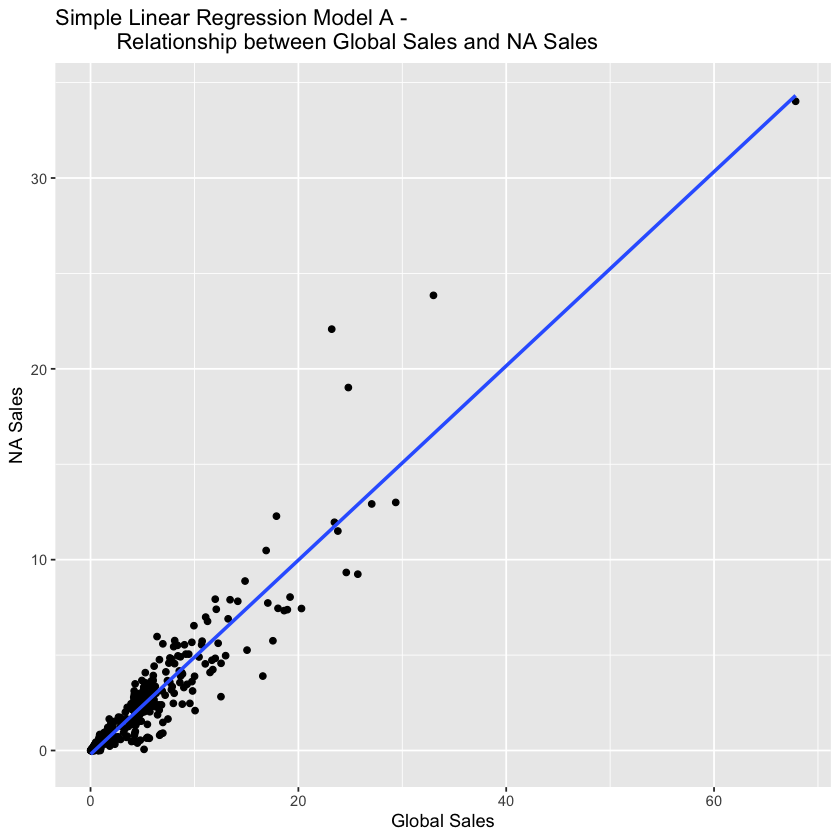

In [9]:
# Create the plot for the lineal regression model A.
ggplot(new_sales, aes(x = Global_Sales, y = NA_Sales)) +
  geom_point() +                 
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  labs(x = "Global Sales", y = "NA Sales") +   
  ggtitle("Simple Linear Regression Model A - 
          Relationship between Global Sales and NA Sales") 

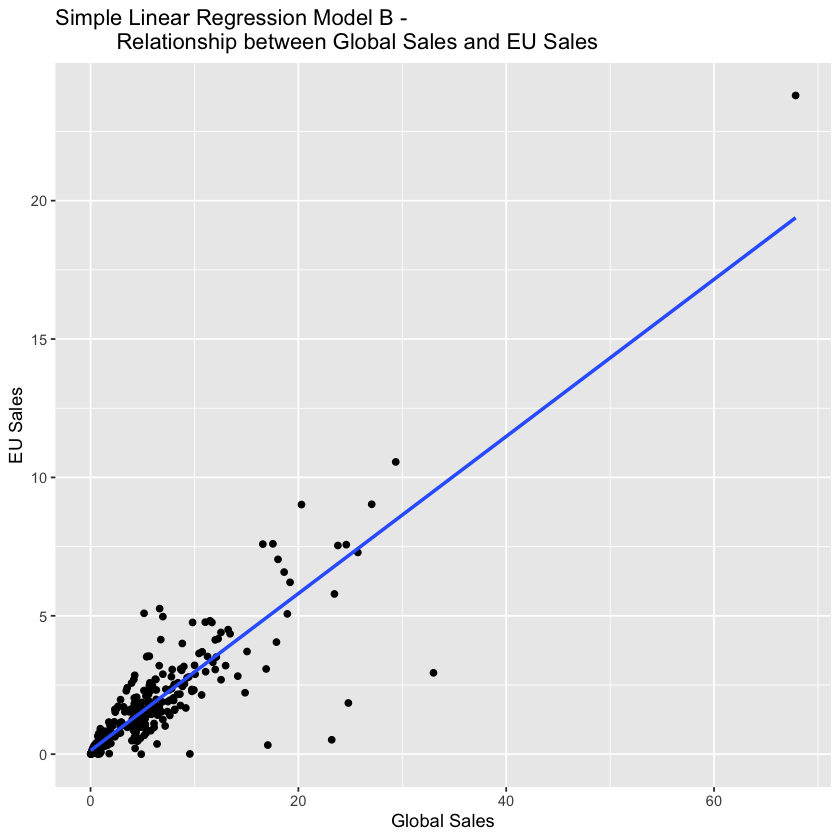

In [10]:
# Create the plot for the lineal regression model B.
ggplot(new_sales, aes(x = Global_Sales, y = EU_Sales)) +
  geom_point() +                 
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  labs(x = "Global Sales", y = "EU Sales") +   
  ggtitle("Simple Linear Regression Model B - 
          Relationship between Global Sales and EU Sales")  

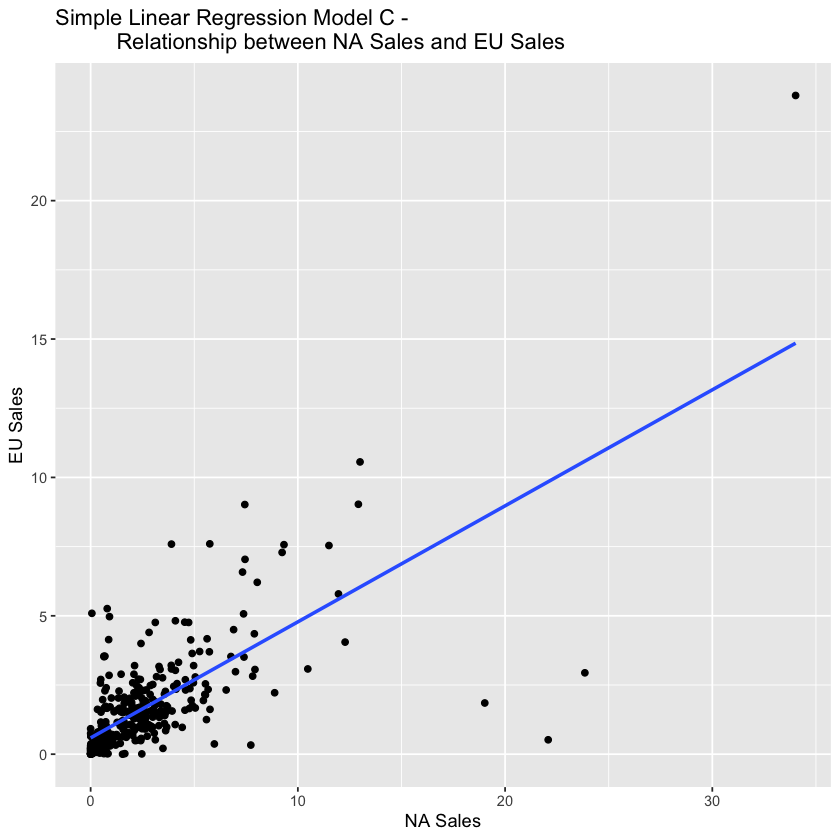

In [11]:
# Create the plot for the lineal regression model C.
ggplot(new_sales, aes(x = NA_Sales, y = EU_Sales)) +
  geom_point() +                 
  geom_smooth(method = "lm", formula = y ~ x, se = FALSE) +
  labs(x = "NA Sales", y = "EU Sales") +   
  ggtitle("Simple Linear Regression Model C - 
          Relationship between NA Sales and EU Sales")  

## 3.Create a multiple linear regression model.
#### Select only numeric columns from the original data frame.

In [12]:
# Import the original data frame.
sales <- read.csv("turtle_sales.csv", header = TRUE)

# Print the data frame.
head(sales)

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,107,Wii,2006,Sports,Nintendo,34.02,23.80,67.85
2,2,123,NES,1985,Platform,Nintendo,23.85,2.94,33.00
3,3,195,Wii,2008,Racing,Nintendo,13.00,10.56,29.37
4,4,231,Wii,2009,Sports,Nintendo,12.92,9.03,27.06
5,5,249,GB,1996,Role-Playing,Nintendo,9.24,7.29,25.72
6,6,254,GB,1989,Puzzle,Nintendo,19.02,1.85,24.81


In [13]:
# Convert the 'product' column to a character type.
sales$Product <- as.character(sales$Product)

# Check the data types after conversion.
str(sales)

'data.frame':	352 obs. of  9 variables:
 $ Ranking     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Product     : chr  "107" "123" "195" "231" ...
 $ Platform    : chr  "Wii" "NES" "Wii" "Wii" ...
 $ Year        : int  2006 1985 2008 2009 1996 1989 2006 2006 2009 1984 ...
 $ Genre       : chr  "Sports" "Platform" "Racing" "Sports" ...
 $ Publisher   : chr  "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales    : num  34.02 23.85 13 12.92 9.24 ...
 $ EU_Sales    : num  23.8 2.94 10.56 9.03 7.29 ...
 $ Global_Sales: num  67.8 33 29.4 27.1 25.7 ...


In [14]:
# Multiple linear regression model.

# Select numeric columns for the model
numeric_cols <- sales[, c("NA_Sales", "EU_Sales", "Global_Sales")]

# Create the multiple linear regression model
model_multiple <- lm(Global_Sales ~ NA_Sales + EU_Sales, data = numeric_cols)

# Print the summary of the model
summary(model_multiple)


Call:
lm(formula = Global_Sales ~ NA_Sales + EU_Sales, data = numeric_cols)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6186 -0.4234 -0.2692  0.0796  7.4639 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.22175    0.07760   2.858  0.00453 ** 
NA_Sales     1.15543    0.02456  47.047  < 2e-16 ***
EU_Sales     1.34197    0.04134  32.466  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.112 on 349 degrees of freedom
Multiple R-squared:  0.9687,	Adjusted R-squared:  0.9685 
F-statistic:  5398 on 2 and 349 DF,  p-value: < 2.2e-16


#### # Multiple linear regression model interpretation:

The adjusted R-squared value of 0.9685 indicates that approximately 96.85% of the variance in the Global Sales is explained by the EU Sales and NA Sales in the linear regression model. This is a high value and suggests that the model fits the data well and is likely to be a good predictor of the Global Sales.

Estimate 2: B1, Intercept (NA Sales): it refers to the estimated coefficient of the NA Sales in the model. Specifically, it represents the change in the Global Sales for a one-unit change in the NA Sales, holding all other variables constant (EU Sales). In this case the estimated coefficient of 1.15 means that for each one-unit increase in the NA Sales, the predicted value of the Global Sales is expected to increase by 1.15 units, while keeping the EU Sales and any other variables constant.  

Estimate 2: B1, Intercept (EU Sales): In this case the estimated coefficient of 1.34 means that for each one-unit increase in the EU Sales, the predicted value of the Global Sales is expected to increase by 1.34 units, while keeping the NA Sales and any other variables constant.

NA Sales: A large t-value, such as 47.047, indicates that the coefficient estimate of NA Sales is highly statistically significant, suggesting a strong and statistically significant relationship between the NA Sales and the Global Sales. It means that the coefficient is unlikely to be zero by chance alone and provides evidence that the variable (NA Sales) has a significant impact on the outcome variable (Global Sales). 

EU Sales: A t-value of 32.466 suggests a strong and statistically significant relationship between the Eu Sales and the Global Sales in the multiple linear regression model.

## 4. Predict global sales based on provided values.
#### Compare your prediction to the observed value(s).

In [15]:
# Provided NA_Sales_sum and EU_Sales_sum values.
# NA_Sales_sum of 34.02 and EU_Sales_sum of 23.80.
# NA_Sales_sum of 3.93 and EU_Sales_sum of 1.56.
# NA_Sales_sum of 2.73 and EU_Sales_sum of 0.65.
# NA_Sales_sum of 2.26 and EU_Sales_sum of 0.97.
# NA_Sales_sum of 22.08 and EU_Sales_sum of 0.52.

In [16]:
# Create a data frame with the provided NA_Sales_sum and EU_Sales_sum values
predicted_global_sales <- data.frame(Provided_NA_Sales = c(34.02, 3.93, 2.73, 2.26, 22.08),
                       Provided_EU_Sales = c(23.80, 1.56, 0.65, 0.97, 0.52))

# Predict global sales using the multiple linear regression model.
predicted_global_sales <- predict(model_multiple, predictedglobalsales = predicted_global_sales)

# Print the predicted global sales.
predicted_global_sales

1          2          3          4          5          6          7 
71.4685720 31.7242593 29.4136250 27.2679725 20.6809417 24.6807609 21.1606831 
         8          9         10         11         12         13         14 
23.6277167 21.8107649 26.4315671 20.9227719 17.8450902 15.5526549 17.5212615 
        15         16         17         18         19         20         21 
18.2772209 19.8454719 17.0644869  9.5961078 16.4639767 14.9135134 11.2780514 
        22         23         24         25         26         27         28 
13.4611853 13.0416082 15.1872607 14.2331221 10.2585695  9.1119898  9.3847523 
        29         30         31         32         33         34         35 
12.3113151 13.4822867 11.3448430 13.4907793  9.5761390 12.0747421 11.4157824 
        36         37         38         39         40         41         42 
12.7812024 12.2973132 11.8686293 11.8076859  9.4946764 10.7681569  6.5149068 
        43         44         45         46         47         48         49 
 9.0241200 10.8916659 10.2144927  7.4391443  9.9132773  3.0890914  9.8007956 
        50         51         52         53         54         55         56 
 7.9349499  8.2977865 10.0314653  8.2887348  8.1428731  8.3973439  9.0136518 
        57         58         59         60         61         62         63 
 8.8612179  8.2568032  7.2471753  8.4619398  9.4149922  9.4868528  9.0510463 
        64         65         66         67         68         69         70 
 7.6127114  7.0698224  9.1107385  5.7998756  8.1988895  8.9367542  7.6535528 
        71         72         73         74         75         76         77 
 8.4424518  6.2369653  8.6270143  4.6779629  6.5172762  8.1357736  4.9413203 
        78         79         80         81         82         83         84 
 7.9427967  5.7985374  8.3580927  6.3630319  5.0364547  6.7827422  8.2048709 
        85         86         87         88         89         90         91 
 7.9358710  6.9655813  5.2645900  4.2745921  4.8500818  7.6162221  6.0850585 
        92         93         94         95         96         97         98 
 6.3451573  6.6181167  6.5159930  6.1840655  6.1923062  6.6304821  4.7847936 
        99        100        101        102        103        104        105 
 6.8560829  6.7990904  6.2653631  6.8031832  6.8774913  6.1461989  6.4316889 
       106        107        108        109        110        111        112 
 5.7607027  5.6436009  5.5450978  5.4725682  6.0295693  6.0729770  6.5676414 
       113        114        115        116        117        118        119 
 5.7118089  6.1149046  6.0276489  5.9311213  5.8736566  6.4365058  6.2571224 
       120        121        122        123        124        125        126 
 5.8009618  5.6928799  5.7695806  4.8643908  5.7395144  5.6965238  5.3331369 
       127        128        129        130        131        132        133 
 5.6157853  4.7888314  5.5356290  6.3718316  4.4042794  4.9800762  4.3543312 
       134        135        136        137        138        139        140 
 5.8246846  5.8967102  5.4053595  3.4798217  7.1217141  6.2546429  5.8899729 
       141        142        143        144        145        146        147 
 5.8426142  5.6659854  4.7584263  5.7773260  4.6365075  5.2503911  5.0189971 
       148        149        150        151        152        153        154 
 2.0011176  5.1337614  1.6106074  5.4862949  3.6249042  4.4393595  5.3249512 
       155        156        157        158        159        160        161 
 4.8333485  3.8059329  4.7722080  3.6754664  5.1415300  4.8821554  5.1594596 
       162        163        164        165        166        167        168 
 1.3030950  4.5600269  4.5041756  4.4817360  4.6062443  4.8515851  4.7088952 
       169        170        171        172        173        174        175 
 4.8580155  3.2428317  3.3501344  4.3218406  5.0699765  2.6039190  3.2301361 
       176        177        178        179        180        181        182 
 4.2483667  4.8742767  4.101387

In [17]:
# Create a data frame with the predicted sales.
predicted_scenarios <- data.frame(
  Predicted_NA_Sales_Sum = c(34.02, 3.93, 2.73, 2.26, 22.08),
  Predicted_EU_Sales_Sum = c(23.80, 1.56, 0.65, 0.97, 0.52),
  Predicted_Other_Sales_Sum = c(0, 0, 0, 0, 0)  # We could add the sum of other sales if available.
)

# Calculate the predicted Global_Sales
predicted_scenarios$Predicted_Global_Sales <- predicted_scenarios$Predicted_NA_Sales_Sum 
+ predicted_scenarios$Predicted_EU_Sales_Sum + predicted_scenarios$Predicted_Other_Sales_Sum

# Print the data frame with predicted values
predicted_scenarios

Predicted_NA_Sales_Sum,Predicted_EU_Sales_Sum,Predicted_Other_Sales_Sum,Predicted_Global_Sales
<dbl>,<dbl>,<dbl>,<dbl>
34.02,23.80,0,57.82
3.93,1.56,0,5.49
2.73,0.65,0,3.38
2.26,0.97,0,3.23
22.08,0.52,0,22.60


In [18]:
# View the descriptive statistics of the predicted_scenarios data frame.
summary(predicted_scenarios)
str(predicted_scenarios)

 Predicted_NA_Sales_Sum Predicted_EU_Sales_Sum Predicted_Other_Sales_Sum
 Min.   : 2.26          Min.   : 0.52          Min.   :0                
 1st Qu.: 2.73          1st Qu.: 0.65          1st Qu.:0                
 Median : 3.93          Median : 0.97          Median :0                
 Mean   :13.00          Mean   : 5.50          Mean   :0                
 3rd Qu.:22.08          3rd Qu.: 1.56          3rd Qu.:0                
 Max.   :34.02          Max.   :23.80          Max.   :0                
 Predicted_Global_Sales
 Min.   : 3.23         
 1st Qu.: 3.38         
 Median : 5.49         
 Mean   :18.50         
 3rd Qu.:22.60         
 Max.   :57.82         

'data.frame':	5 obs. of  4 variables:
 $ Predicted_NA_Sales_Sum   : num  34.02 3.93 2.73 2.26 22.08
 $ Predicted_EU_Sales_Sum   : num  23.8 1.56 0.65 0.97 0.52
 $ Predicted_Other_Sales_Sum: num  0 0 0 0 0
 $ Predicted_Global_Sales   : num  57.82 5.49 3.38 3.23 22.6


# 